# Laboratorium 1


### Konfiguracja

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js
import random
import math

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [11]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})
  


### Przykład użycia

<IPython.core.display.Javascript object>


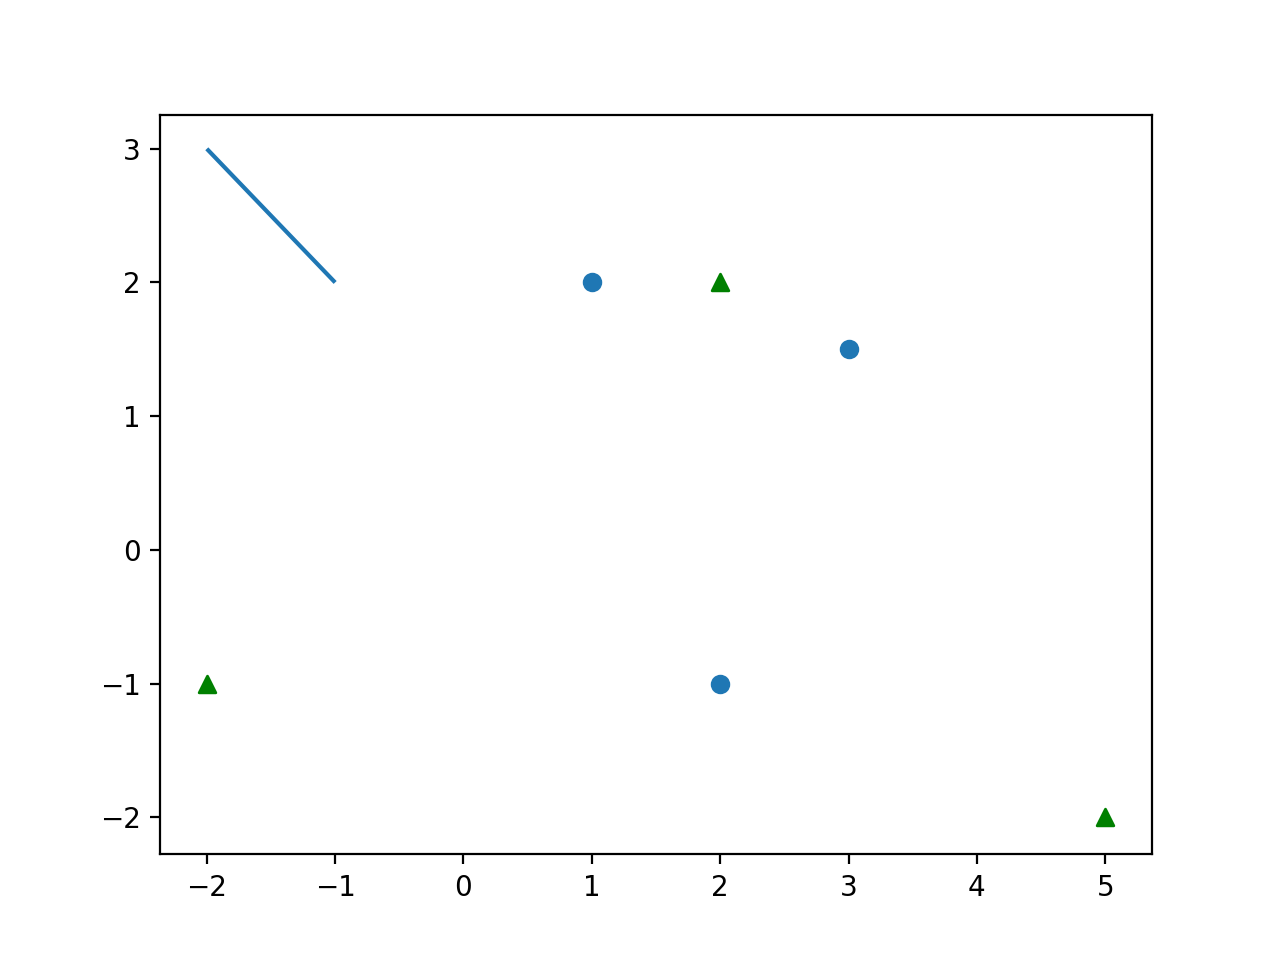

'{"points": [[[1.0, 2.0], [3.0, 1.5], [2.0, -1.0]], [[5, -2], [2, 2], [-2, -1]]], "lines": [[[[-1, 2], [-2, 3]]]]}'

In [12]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()
plot.toJSON()

### Rozwiązanie

In [14]:
%matplotlib notebook

def get_random(range_min,range_max):
    return random.uniform(range_min,range_max)

def get_random_from_range(range_min,range_max,n):
    points = []
    for i in range(0,n):
        points.append((get_random(range_min,range_max), get_random(range_min,range_max)))
    return points 

def get_random_circle(x,y,R,n):
    points = []
    for i in range(0,n):
        angle = get_random(0, 2 * math.pi)
        points.append(((x + R * math.cos(angle)), (y + R * math.sin(angle))))
    return points

def get_random_on_line(min_range, max_range , n):
    points = []
    for i in range(0,n):
        x = get_random(min_range,max_range)
        points.append((x, (0.05 * x + 0.05)))
    return points    
        

 a) 10^5 losowych punktów o współrzędnych z przedziału [-1000, 1000]

<IPython.core.display.Javascript object>


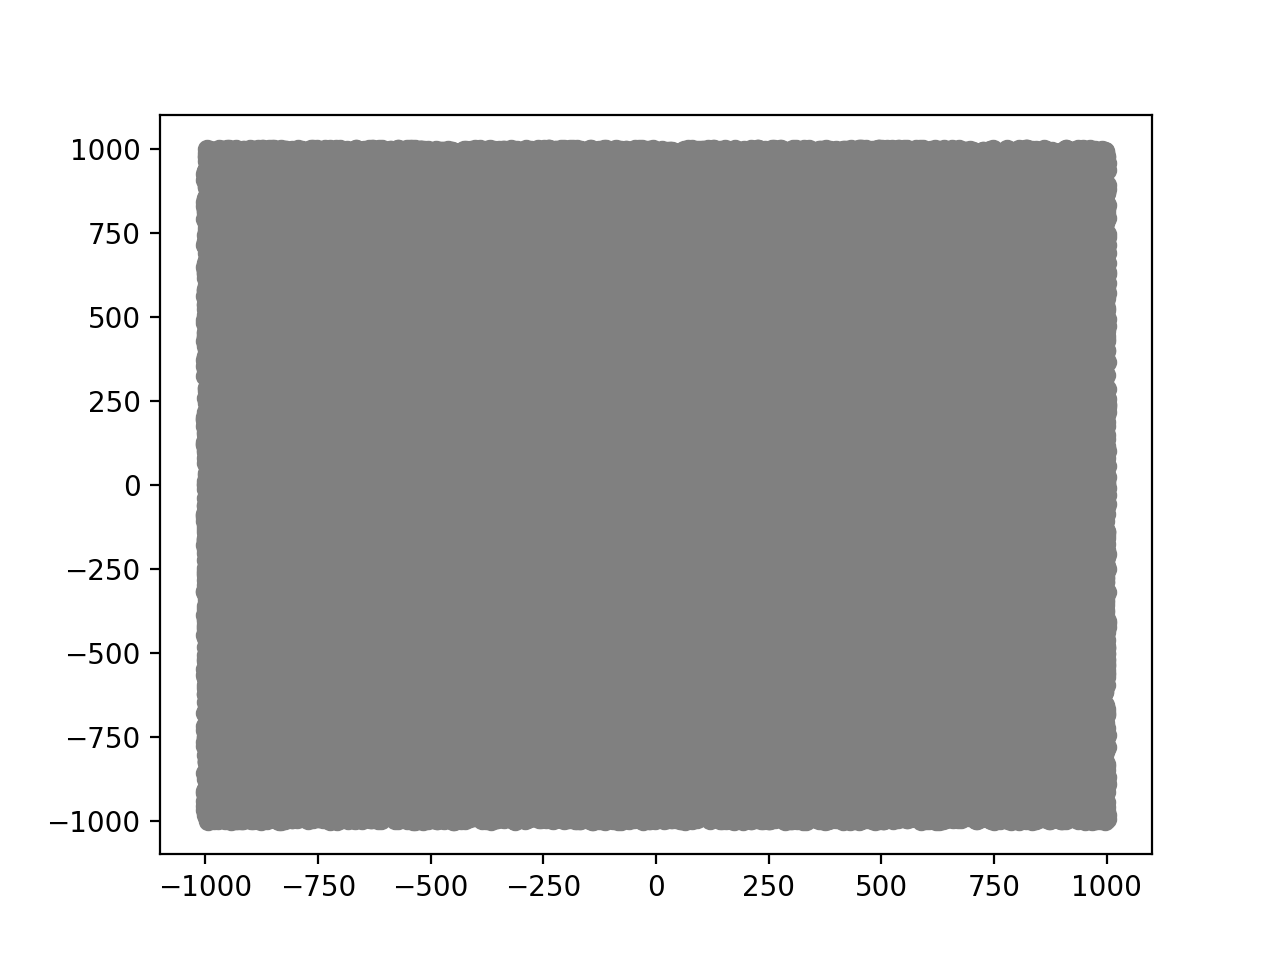

In [16]:
%matplotlib notebook

pointsA = get_random_from_range(-1000,1000, 10 ** 5)
plotA=Plot([PointsCollection(pointsA, color = "gray")])
plotA.draw()

b) 10^5 losowych punktów o współrzędnych z przedziału [-10^14, 10^14]

<IPython.core.display.Javascript object>


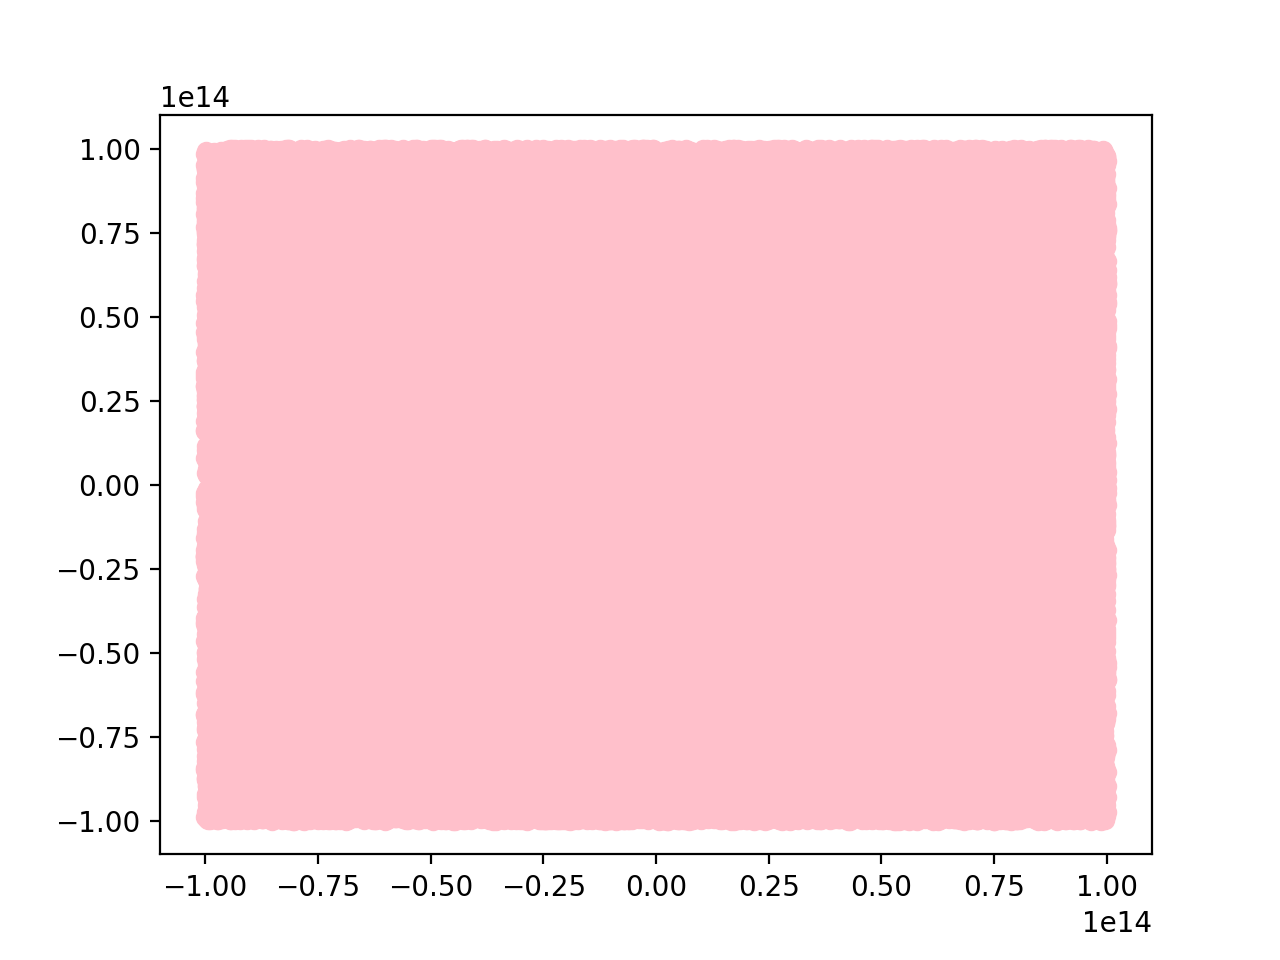

In [17]:
%matplotlib notebook

pointsB = get_random_from_range(-10 ** 14, 10 ** 14, 10 ** 5)
plotB=Plot([PointsCollection(pointsB, color = "pink")])
plotB.draw()

c) 1000 losowych punktów leżących na okręgu o środku (0,0) i promieniu R=100

<IPython.core.display.Javascript object>


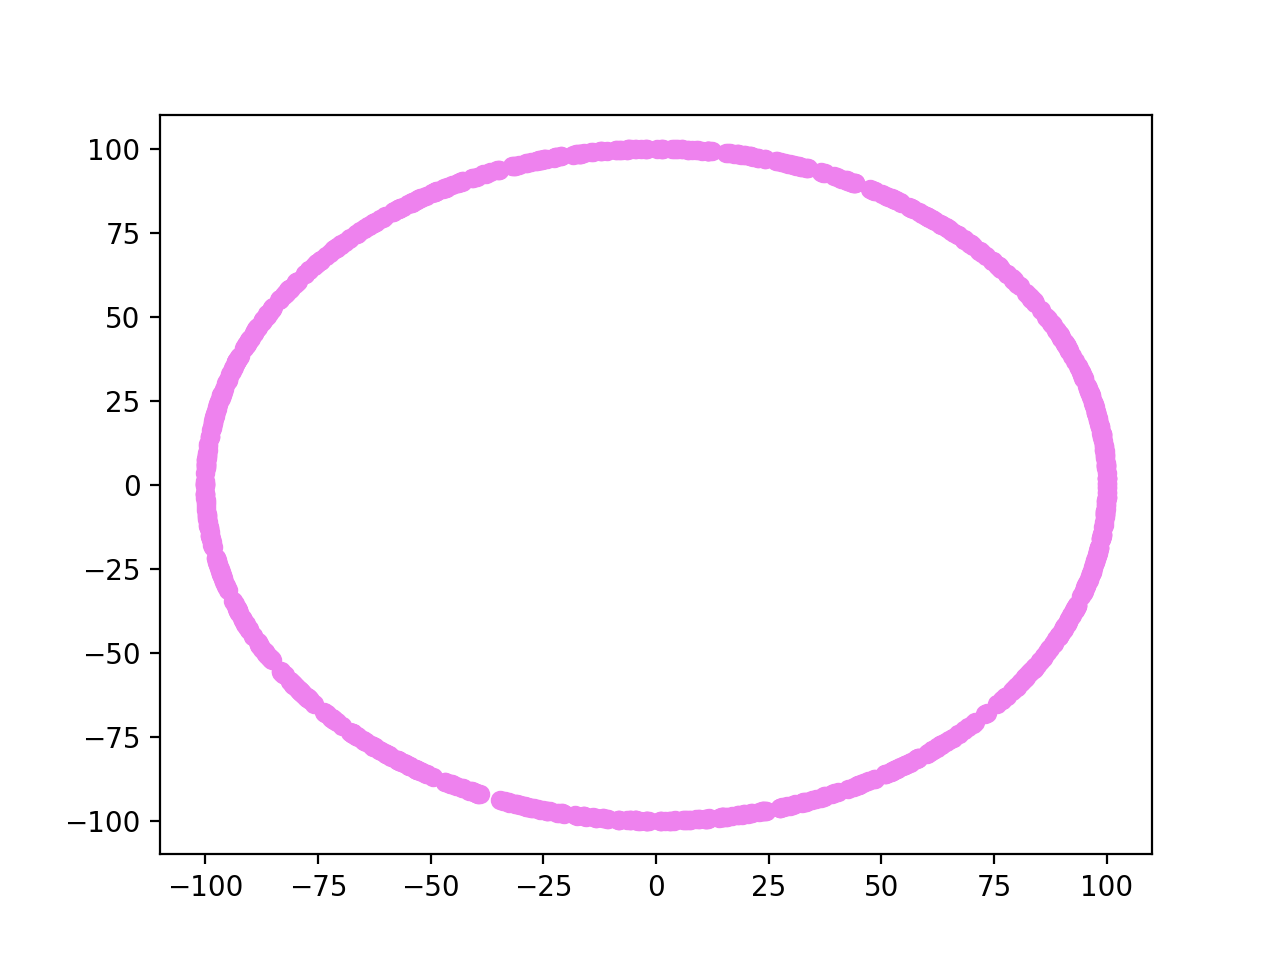

In [18]:
%matplotlib notebook
pointsC = get_random_circle(0,0,100,1000)
plotC=Plot([PointsCollection(pointsC, color = "violet")])
plotC.draw()

d) 1000 losowych punktów o współrzędnych z przedziału [-1000, 1000] leżących na 
prostej wyznaczonej przez wektor (a, b), przyjmij a = [-1.0, 0.0], b = [1.0, 0.1]

<IPython.core.display.Javascript object>


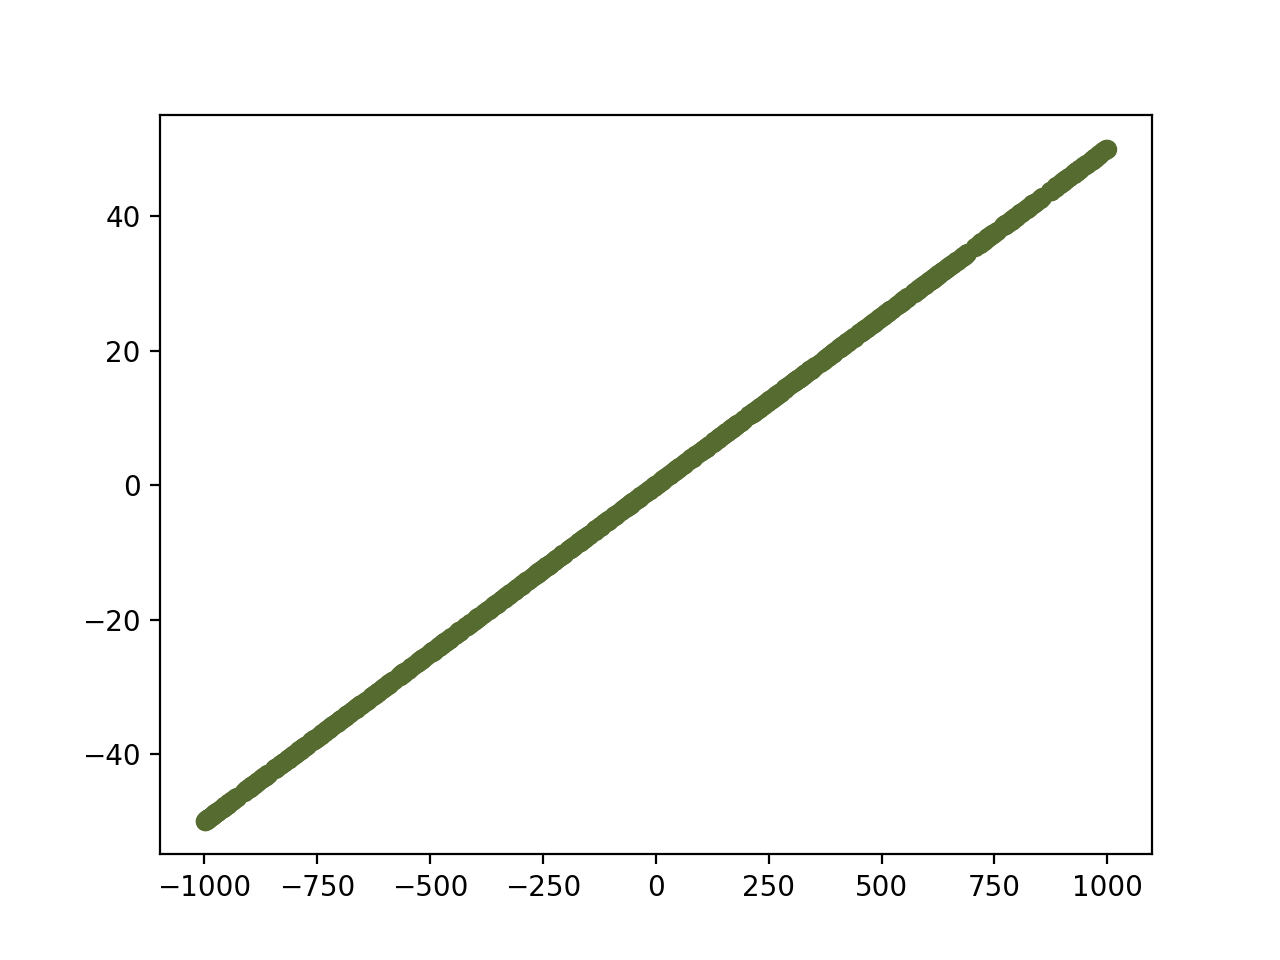

In [19]:
%matplotlib notebook
pointsD= get_random_on_line(-1000, 1000, 1000)
plotD=Plot([PointsCollection(pointsD, color = 'darkolivegreen')])
plotD.draw()

Funkcja licząca wznaczniki 

In [2]:
def count_det(a_x, a_y, b_x, b_y, p_x, p_y, epsilon, dim):
    if dim == 3 :    
        determinant = a_x * b_y + a_y * p_x + b_x * p_y - b_y * p_x - a_x * p_y - a_y * b_x
    if dim == 2 :
        determinant = (a_x - p_x) * (b_y - p_y) - (a_y - p_y) * (b_x - p_x)
    if abs(determinant) > epsilon:
        if determinant > 0 :
                return 1
        else : return -1
        
    if abs(determinant) < epsilon:
            return 0          

In [ ]:
Klasyfikacja punktów 

In [3]:
def classify_points(points, a_x, a_y, b_x, b_y, epsilon, dim):
    points_on = []
    points_left = []
    points_right = []
    
    for i in range(0, len(points)):
        sgn_det=count_det(a_x, a_y, b_x, b_y, points[i][0], points[i][1], epsilon, dim)
        if sgn_det == 1:
            points_left.append(points[i])
        if sgn_det == -1:
            points_right.append(points[i])
        if sgn_det == 0:
            points_on.append(points[i])
    return PointsCollection(points_left, color="gray"), PointsCollection(points_right, color="lightpink"),PointsCollection(points_on, color="violet")
    

Poniżej znajdują się podziały punktów względem ich orientacji w stosunku do odcinka ab ( a = [-1.0, 0.0], b = [1.0, 0.1] (ponumerowane od 1 - 13). Dla każdego zbioru obliczenia zostały wykonane przy pomocy dwóch wyznaczników. Po każdym przykładzie znajduje się porównanie (ile i jakie punkty zostały  zakwalifikowane inaczej dla różnych sposobów liczenia). Wyniki zbadałam dla róznych precyzji (epsilon)

# 1. 

1 zbiór punktów dla wyznacznika 1, epsilon = 0.01 : 

<IPython.core.display.Javascript object>


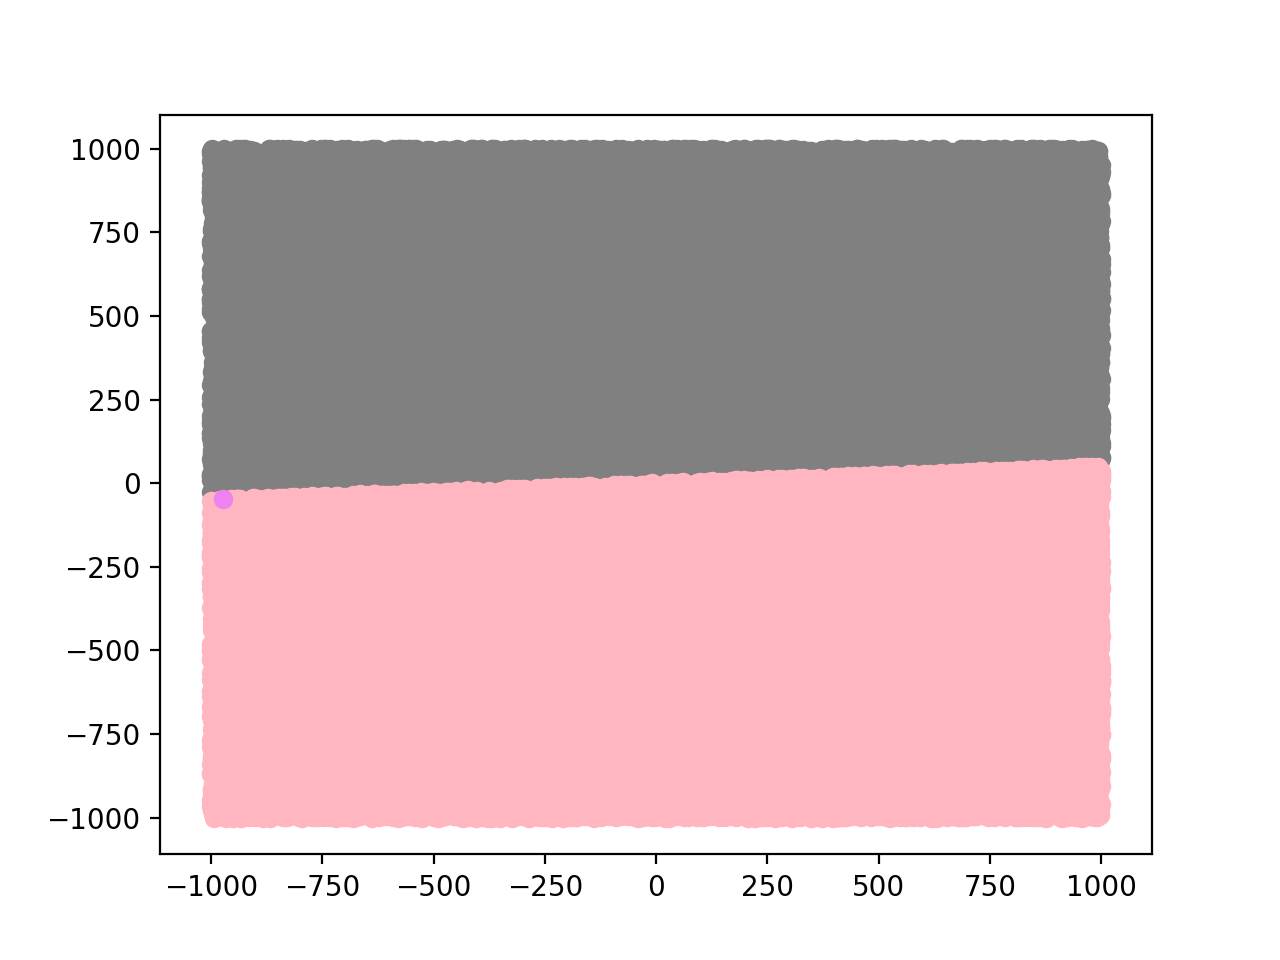

on the left :  49866
on the line  :  1
on the right :  50133


In [146]:
%matplotlib notebook
epsilon=0.01
dim=3
points1 = get_random_from_range(-1000,1000, 10 ** 5)
result = classify_points(points1, -1.0, 0.0, 1.0, 0.1, epsilon, dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left1_1= len(result[0].points)
right1_1=len(result[1].points)
on1_1=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line  : " , len(result[2].points))
print ("on the right : ", len(result[1].points))  
       

1 zbiór puktów dla wyznacznika 2, epsilon = 0.01

<IPython.core.display.Javascript object>


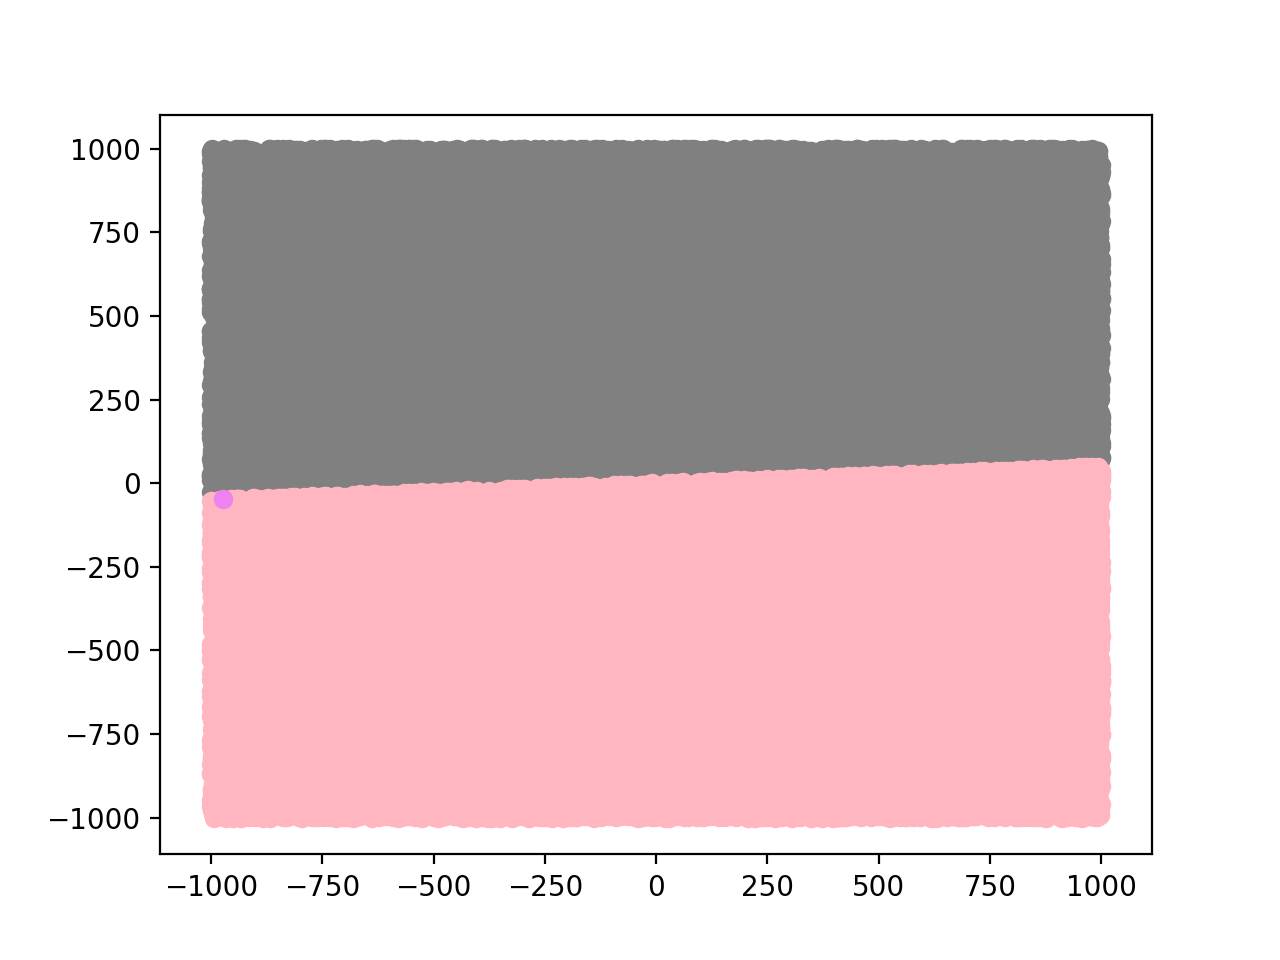

on the left :  49866
on the line :  1
on the right :  50133
Ex1 : difference  0  on left
Ex1: difference  0  on right
Ex1: difference  0  on line


In [149]:
%matplotlib notebook
epsilon=0.01
dim=2
result = classify_points(points1, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left1_2= len(result[0].points)
right1_2=len(result[1].points)
on1_2=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 


print("Ex1 : difference ", left1_2 - left1_1, " on left")
print("Ex1: difference ", right1_2 - right1_1, " on right")
print("Ex1: difference ", on1_2 - on1_1, " on line")

# 2.

 1. pierwszy zbiór punktów dla wyznacznika 1, epsilon = 0.1

<IPython.core.display.Javascript object>


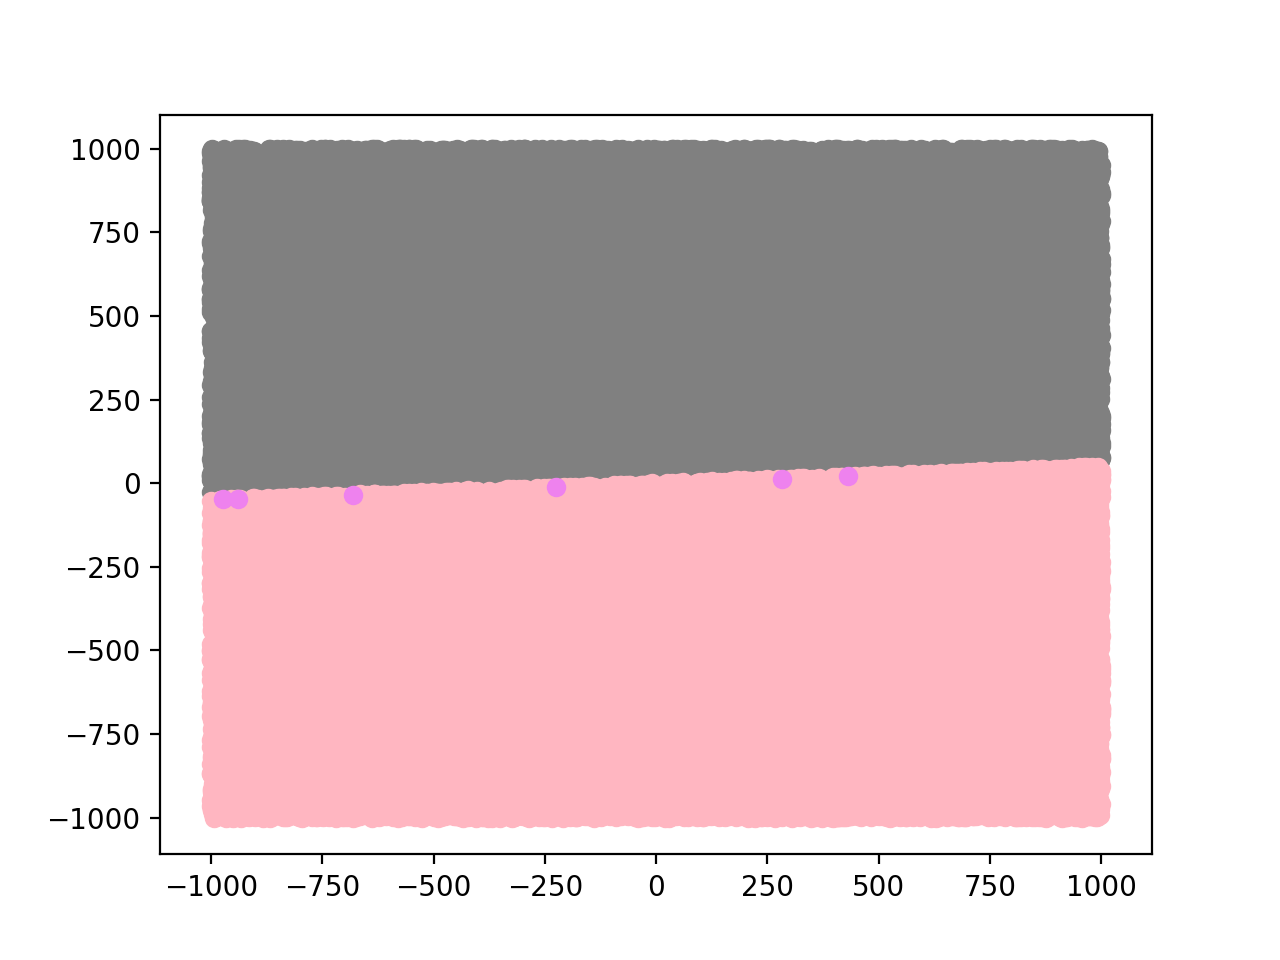

on the left :  49866
on the line :  6
on the right :  50128


In [150]:
%matplotlib notebook
epsilon=0.1
dim=3
result = classify_points(points1, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left2_1= len(result[0].points)
right2_1=len(result[1].points)
on2_1=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

2. pierwszy zbiór punktów dla wyznacznika 2, epsilon = 0.1

<IPython.core.display.Javascript object>


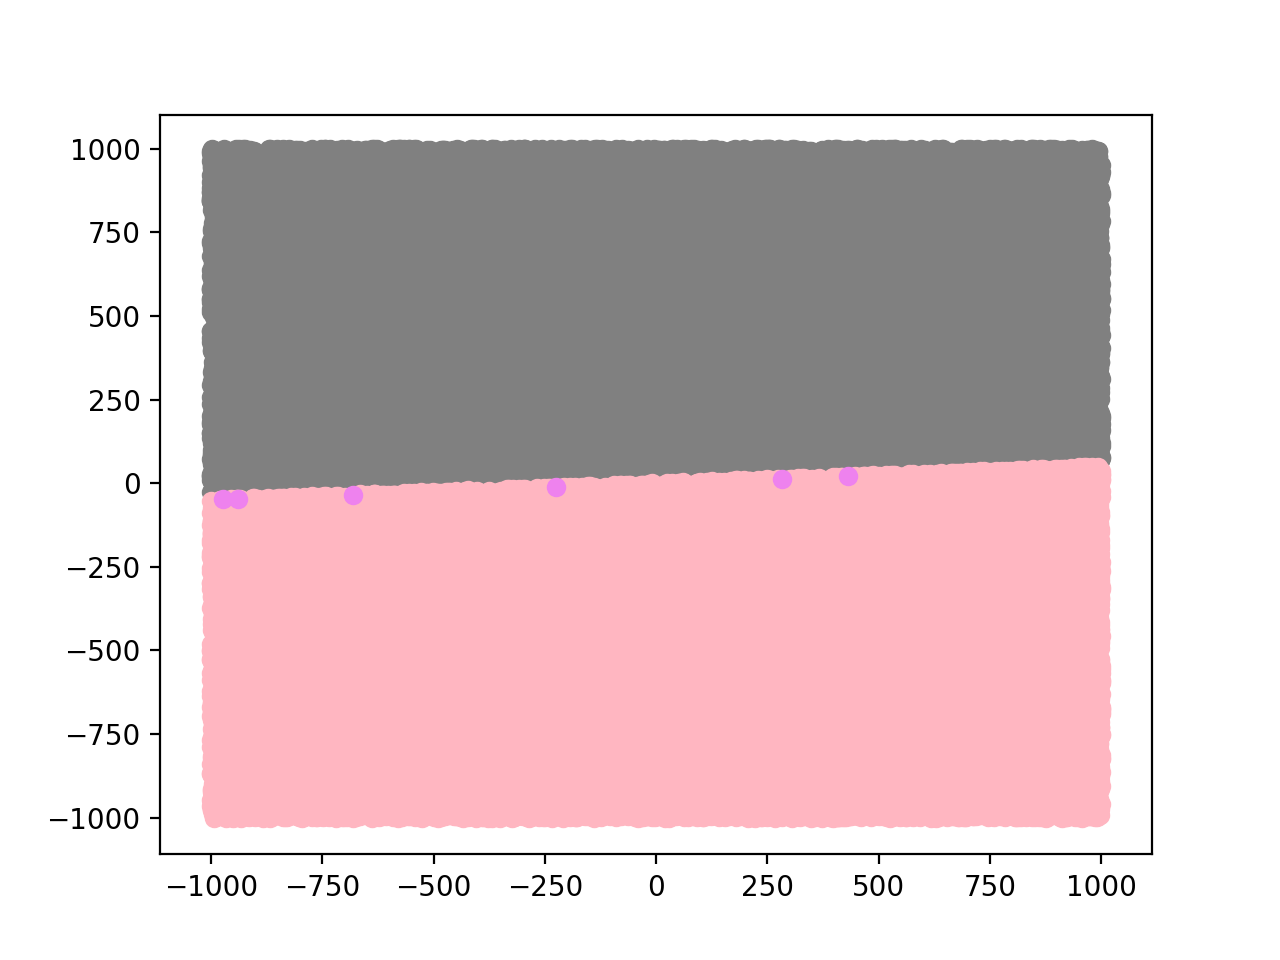

above line :  49866
on line :  6
under line :  50128
Ex2 : difference  0  on left
Ex2: difference  0  on right
Ex2: difference  0  on line


In [151]:
%matplotlib notebook
epsilon=0.1
dim=2
result=[]
result = classify_points(points1, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left2_2= len(result[0].points)
right2_2=len(result[1].points)
on2_2=len(result[2].points)

print ("above line : " , len(result[0].points))
print ("on line : " , len(result[2].points))
print ("under line : ", len(result[1].points)) 

print("Ex2 : difference ", left2_2 - left2_1, " on left")
print("Ex2: difference ", right2_2 - right2_1, " on right")
print("Ex2: difference ", on2_2 - on2_1, " on line")



# 3

3. pierwszy zbior punktów dla wyznacznika 1, epsilon = 1

<IPython.core.display.Javascript object>


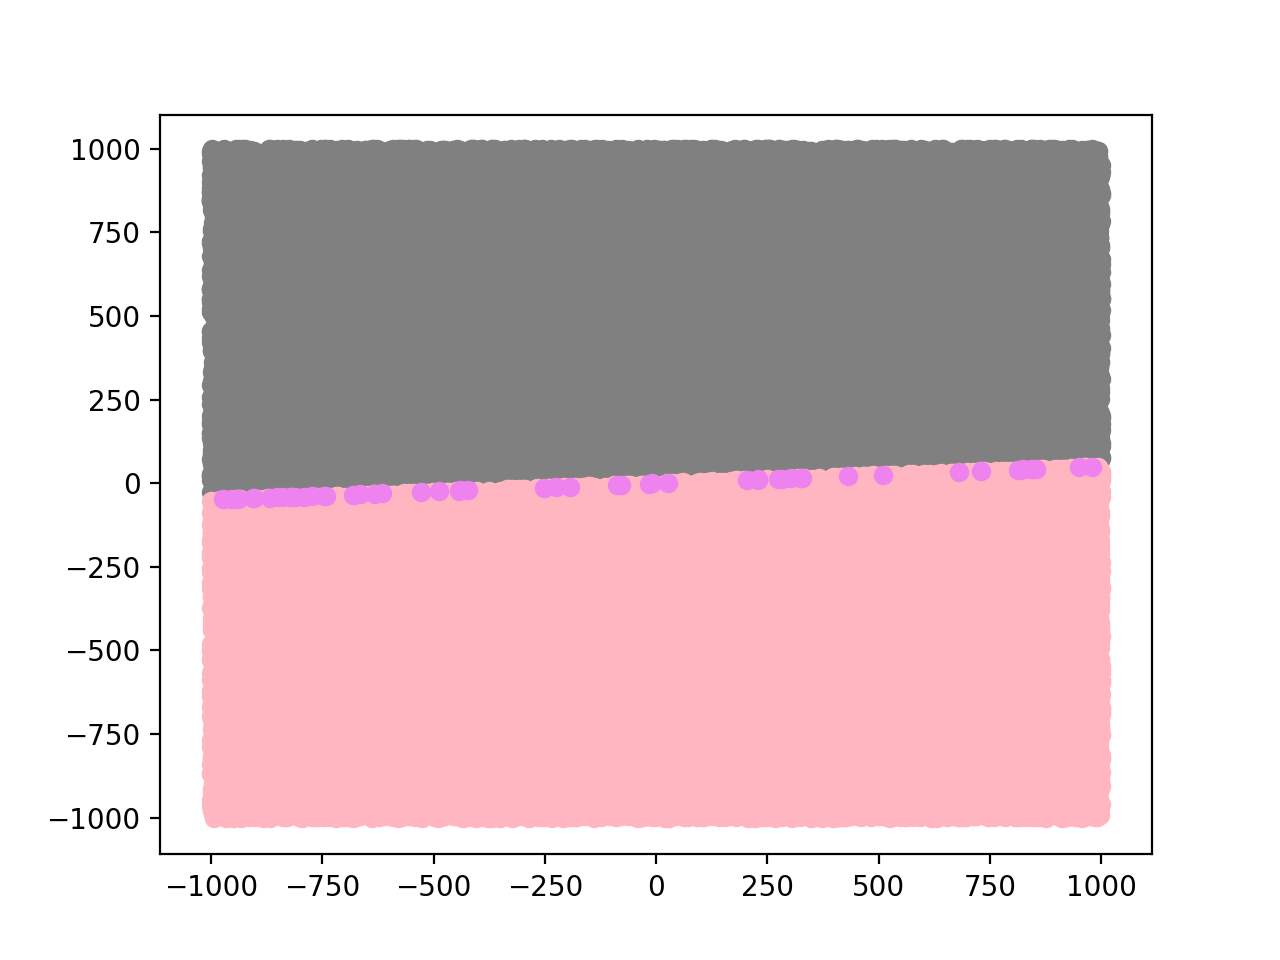

on the left :  49845
on the line :  53
on the right :  50102


In [152]:
%matplotlib notebook
epsilon=1
dim=3
result = classify_points(points1, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left3_1= len(result[0].points)
right3_1=len(result[1].points)
on3_1=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

1 zbior punktow dla wyznacznika 2, epsilon = 1

<IPython.core.display.Javascript object>


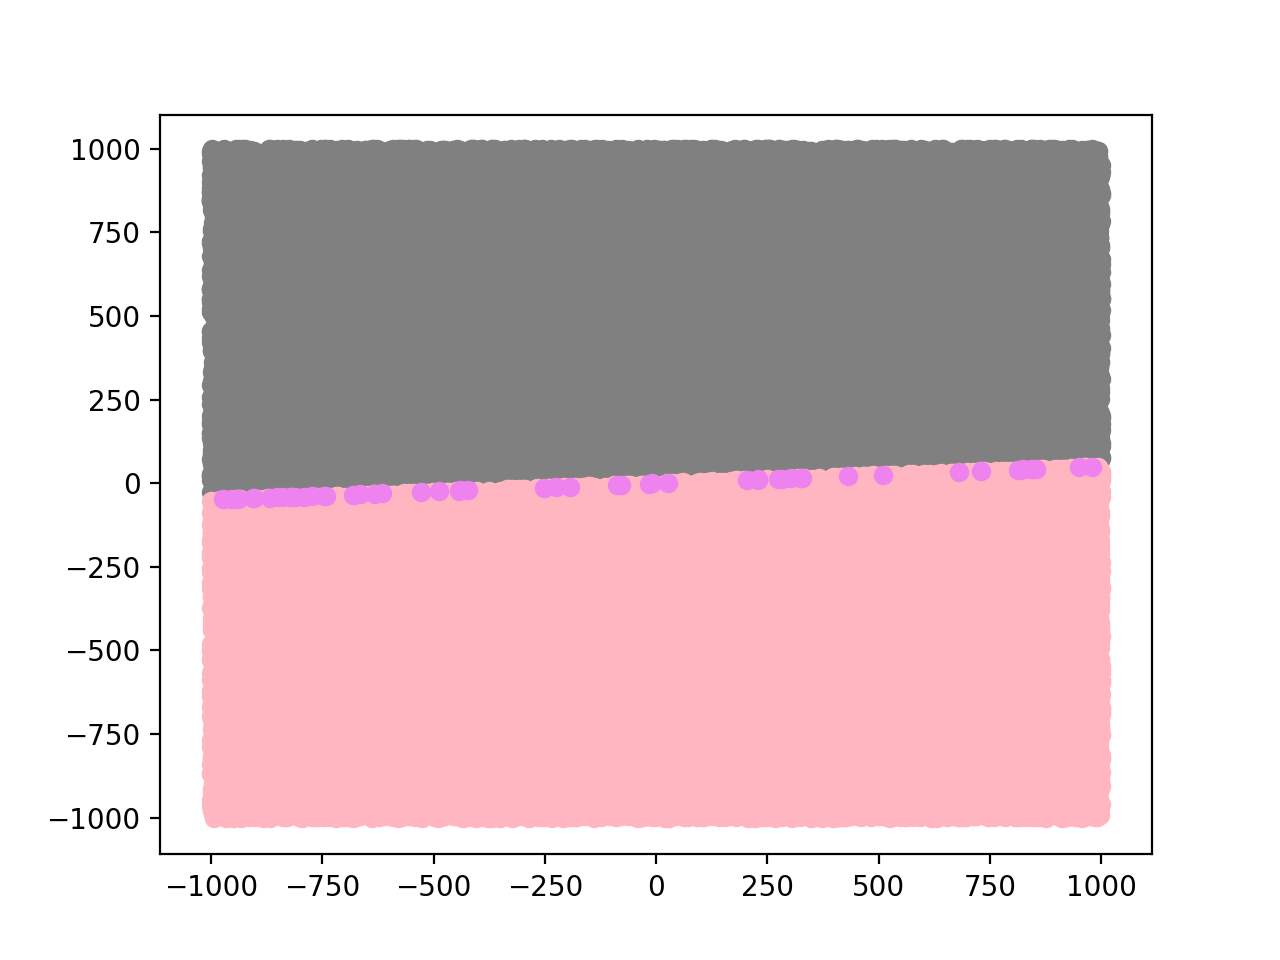

on the left :  49845
on the line :  53
on the right :  50102
Ex3 : difference  0  on left
Ex3: difference  0  on right
Ex3: difference  0  on line


In [157]:
%matplotlib notebook
epsilon=1
dim=2
result = classify_points(points1, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left3_2= len(result[0].points)
right3_2=len(result[1].points)
on3_2=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

print("Ex3 : difference ", left3_2 - left3_1, " on left")
print("Ex3: difference ", right3_2 - right3_1, " on right")
print("Ex3: difference ", on3_2 - on3_1, " on line")

# 4 

 4. pierwszy zbior punktow dla wyznacznika 1, epsilon = 10

<IPython.core.display.Javascript object>


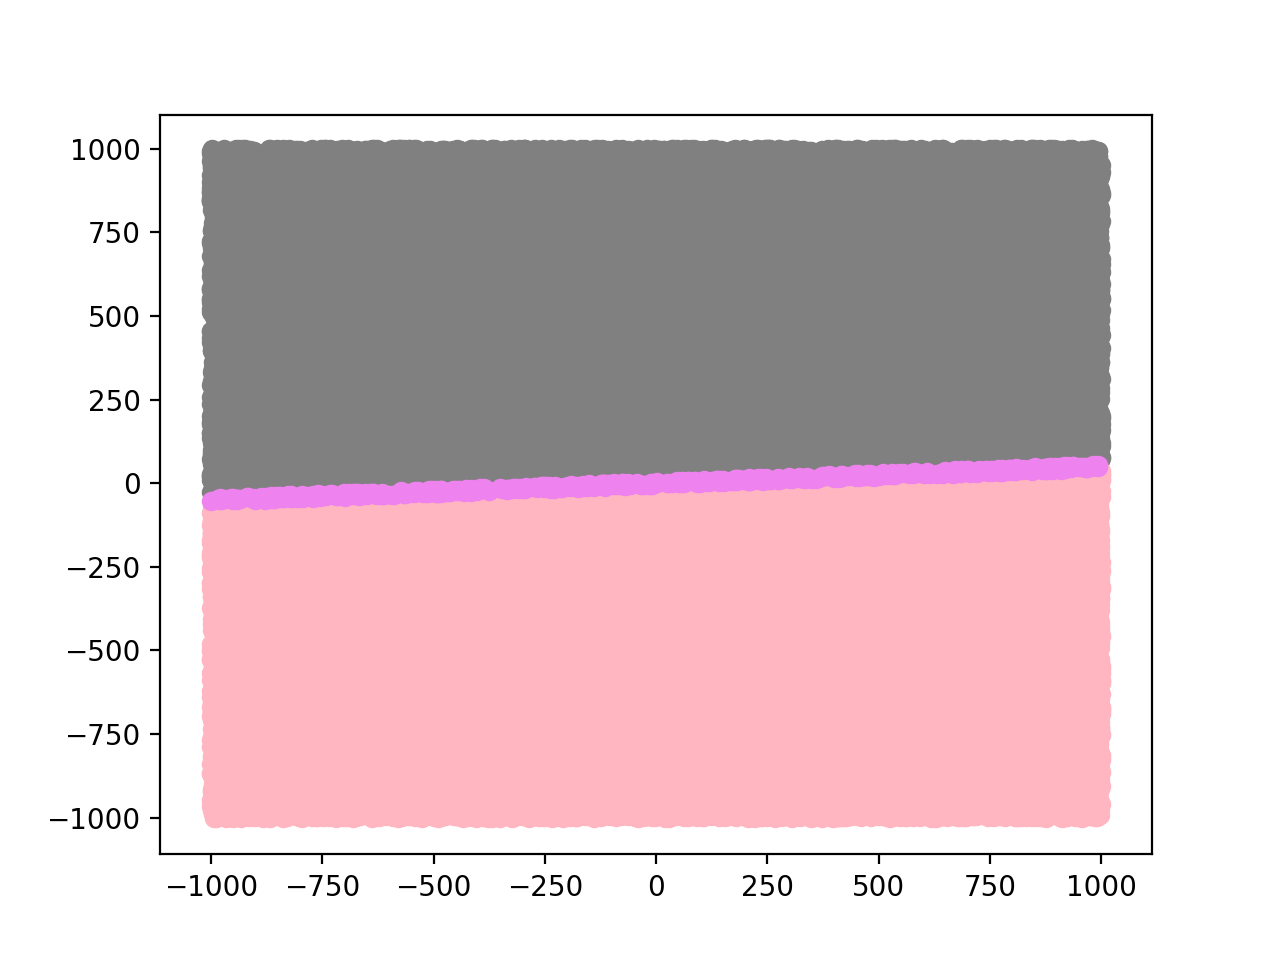

on the left :  49628
on the line :  488
on the right :  49884


In [155]:
%matplotlib notebook
epsilon=10
dim=3
result = classify_points(points1, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left4_1= len(result[0].points)
right4_1=len(result[1].points)
on4_1=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

4. pierwszy zbiór punktów dla wyznacznika 2, epsilon = 10

<IPython.core.display.Javascript object>


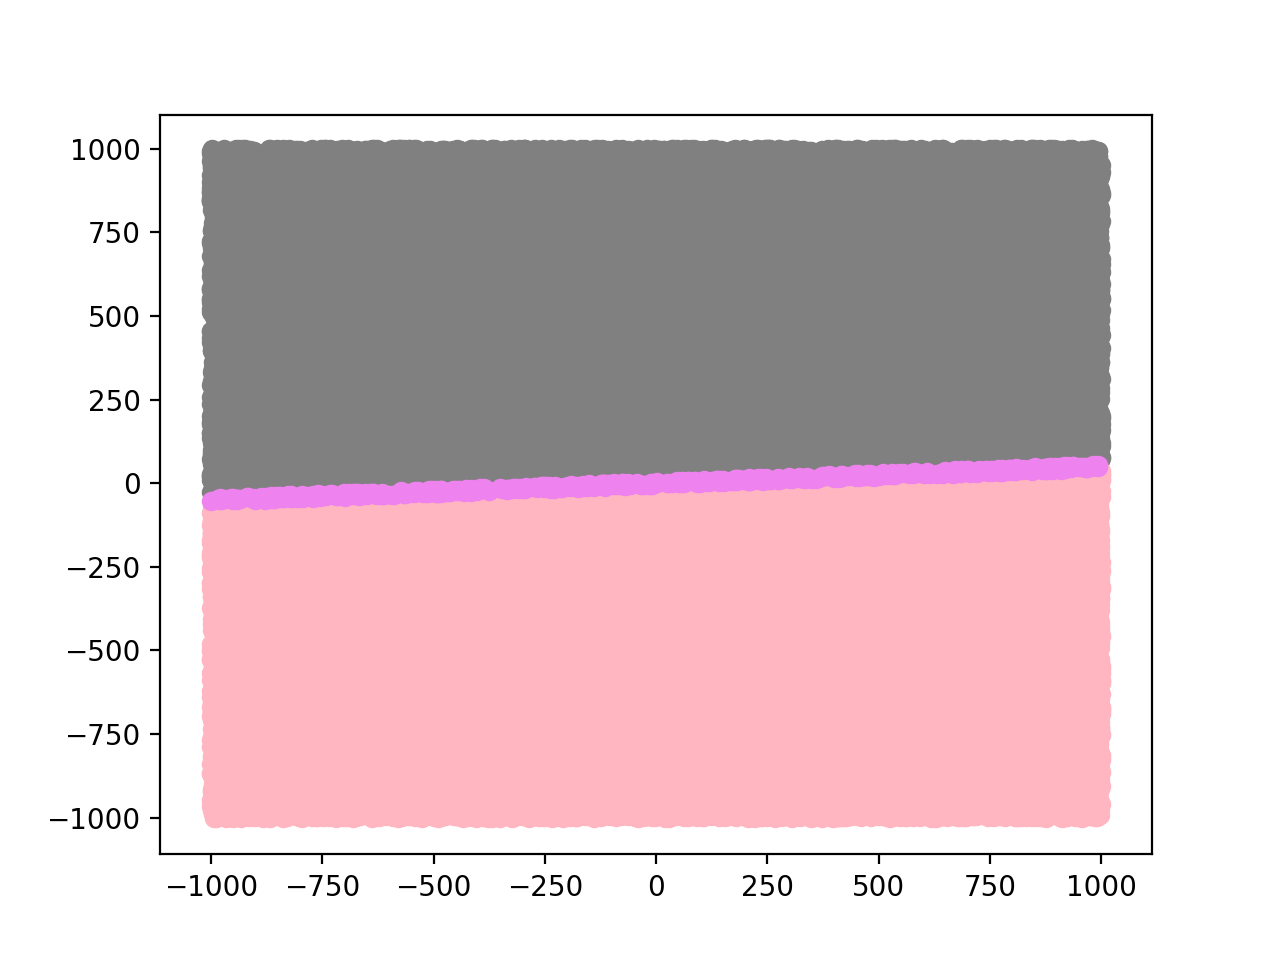

on the left :  49628
on the line :  488
on the right :  49884
Ex4 : difference  0  on left
Ex4: difference  0  on right
Ex4: difference  0  on line


In [158]:
%matplotlib notebook
epsilon=10
dim=2
result = classify_points(points1, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left4_2= len(result[0].points)
right4_2=len(result[1].points)
on4_2=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

print("Ex4 : difference ", left4_2 - left4_1, " on left")
print("Ex4: difference ", right4_2 - right4_1, " on right")
print("Ex4: difference ", on4_2 - on4_1, " on line")

# 5.

 5. drugi zbior punktow dla 1 wyznacznika, epsilon = 0.01

<IPython.core.display.Javascript object>


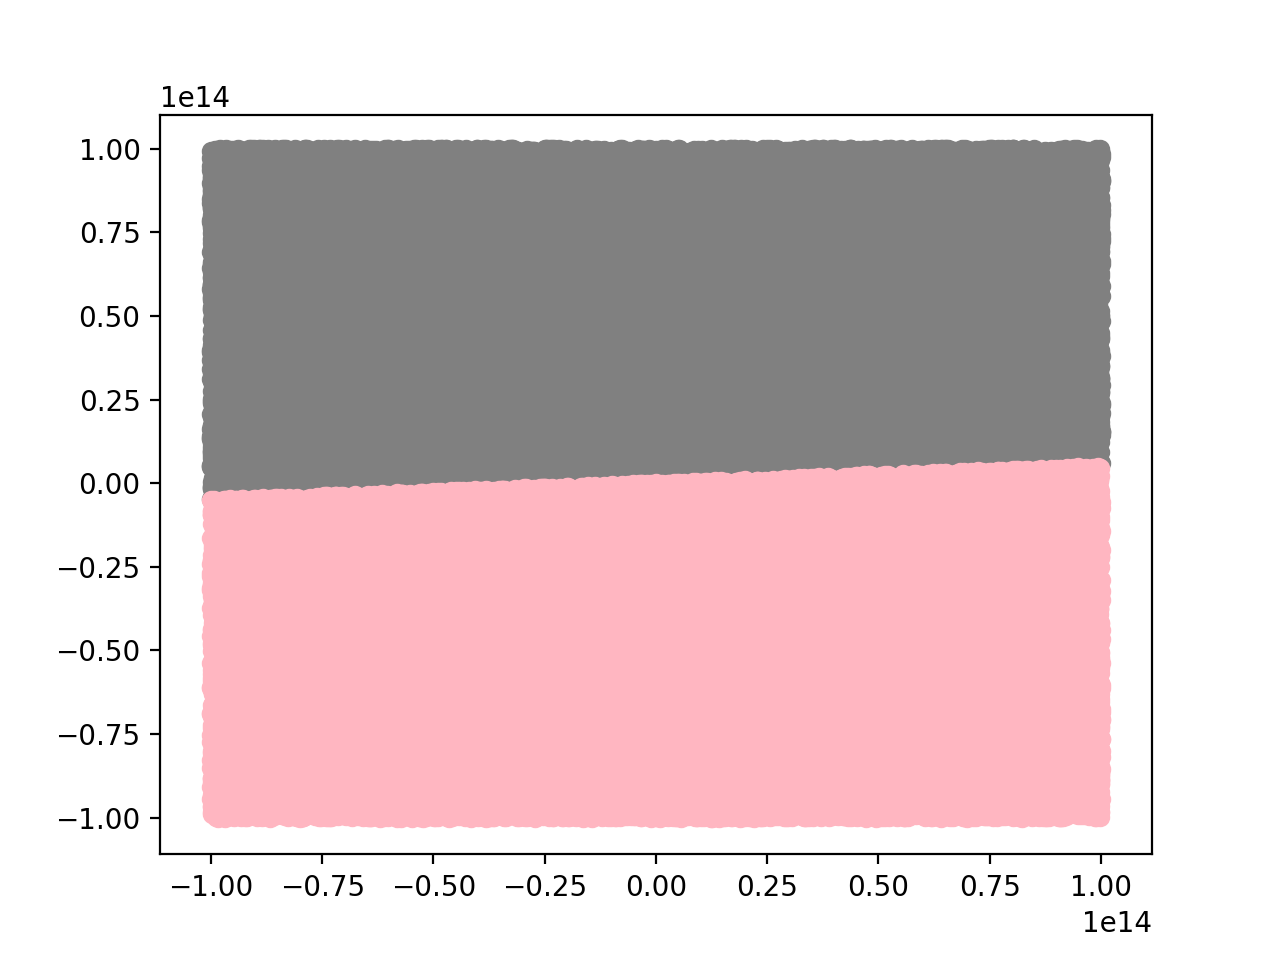

on the left :  50230
on the line :  0
on the right :  49770


In [159]:
%matplotlib notebook
epsilon=0.01
dim=3
points2=get_random_from_range(-10 ** 14, 10 ** 14, 10 ** 5)
result = classify_points(points2, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left5_1= len(result[0].points)
right5_1=len(result[1].points)
on5_1=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

5. drugi zbior punktow dla wyznacznika 2,epsilon = 0.01

<IPython.core.display.Javascript object>


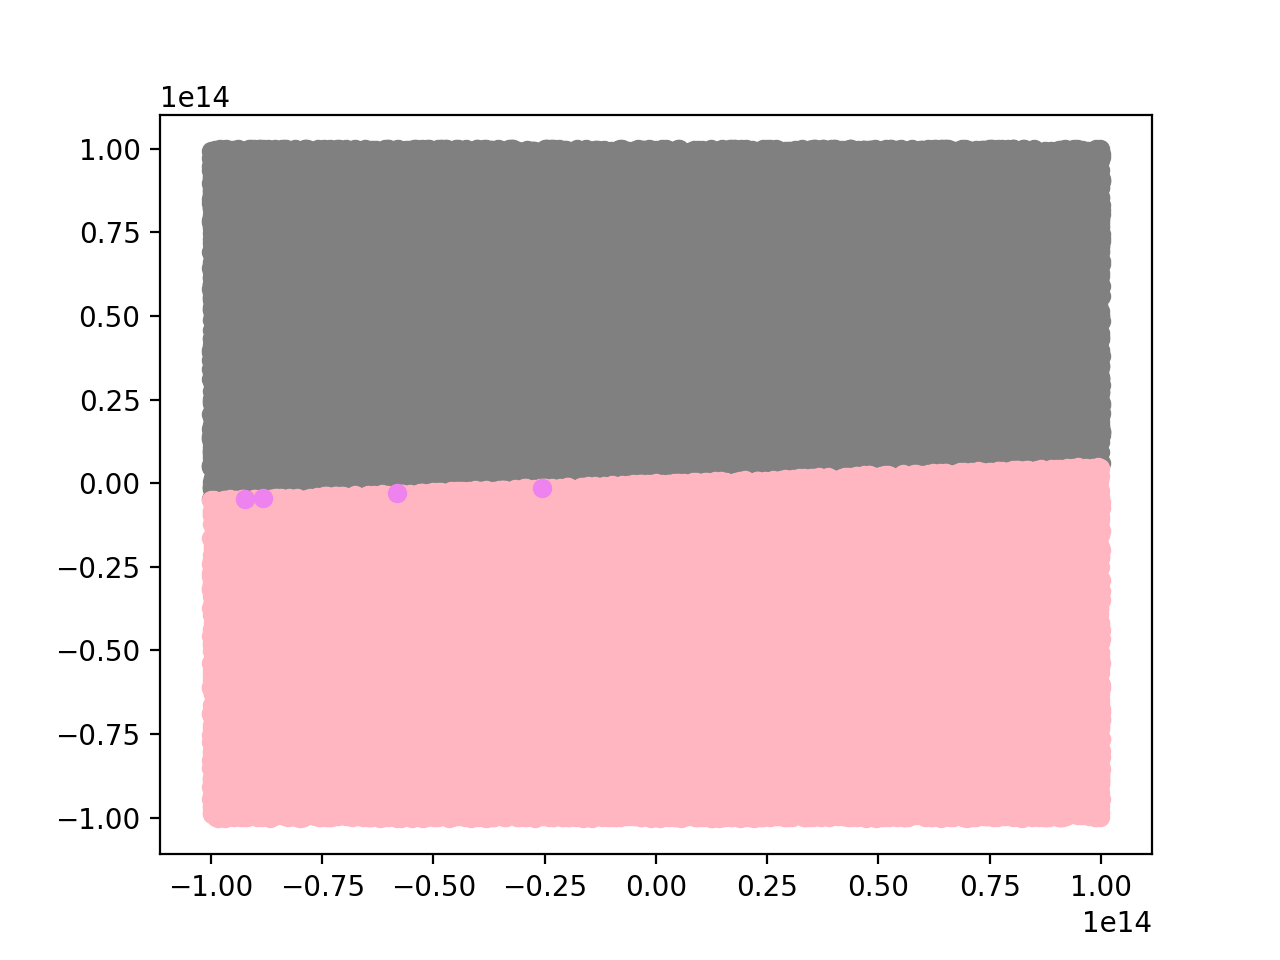

on the left :  50229
on the line :  4
on the right :  49767
Ex5 : difference  -1  on left
Ex5: difference  -3  on right
Ex5: difference  4  on line


In [160]:
%matplotlib notebook
epsilon=0.01
dim=2
result = classify_points(points2, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left5_2= len(result[0].points)
right5_2=len(result[1].points)
on5_2=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

print("Ex5 : difference ", left5_2 - left5_1, " on left")
print("Ex5: difference ", right5_2 - right5_1, " on right")
print("Ex5: difference ", on5_2 - on5_1, " on line")

# 6.

6. drugi zbior punktow dla wyznacznika 1,epsilon = 1000

<IPython.core.display.Javascript object>


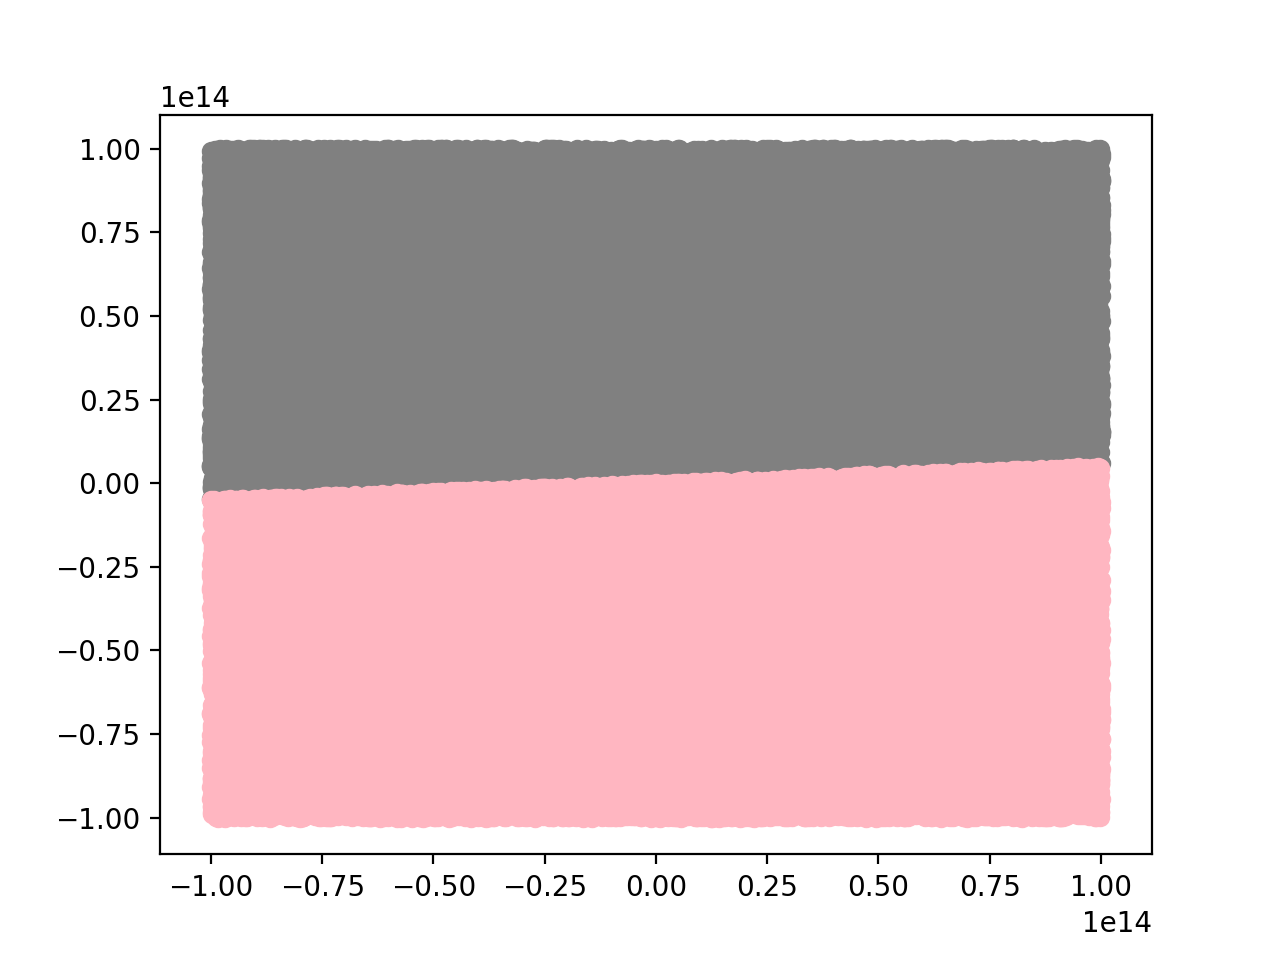

on the left :  50230
on the line :  0
on the right :  49770


In [161]:
%matplotlib notebook
epsilon=1000
dim=3
result = classify_points(points2, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left6_1= len(result[0].points)
right6_1=len(result[1].points)
on6_1=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

6. drugi zbior punktow dla wyznacznika 2, epsilon = 1000

<IPython.core.display.Javascript object>


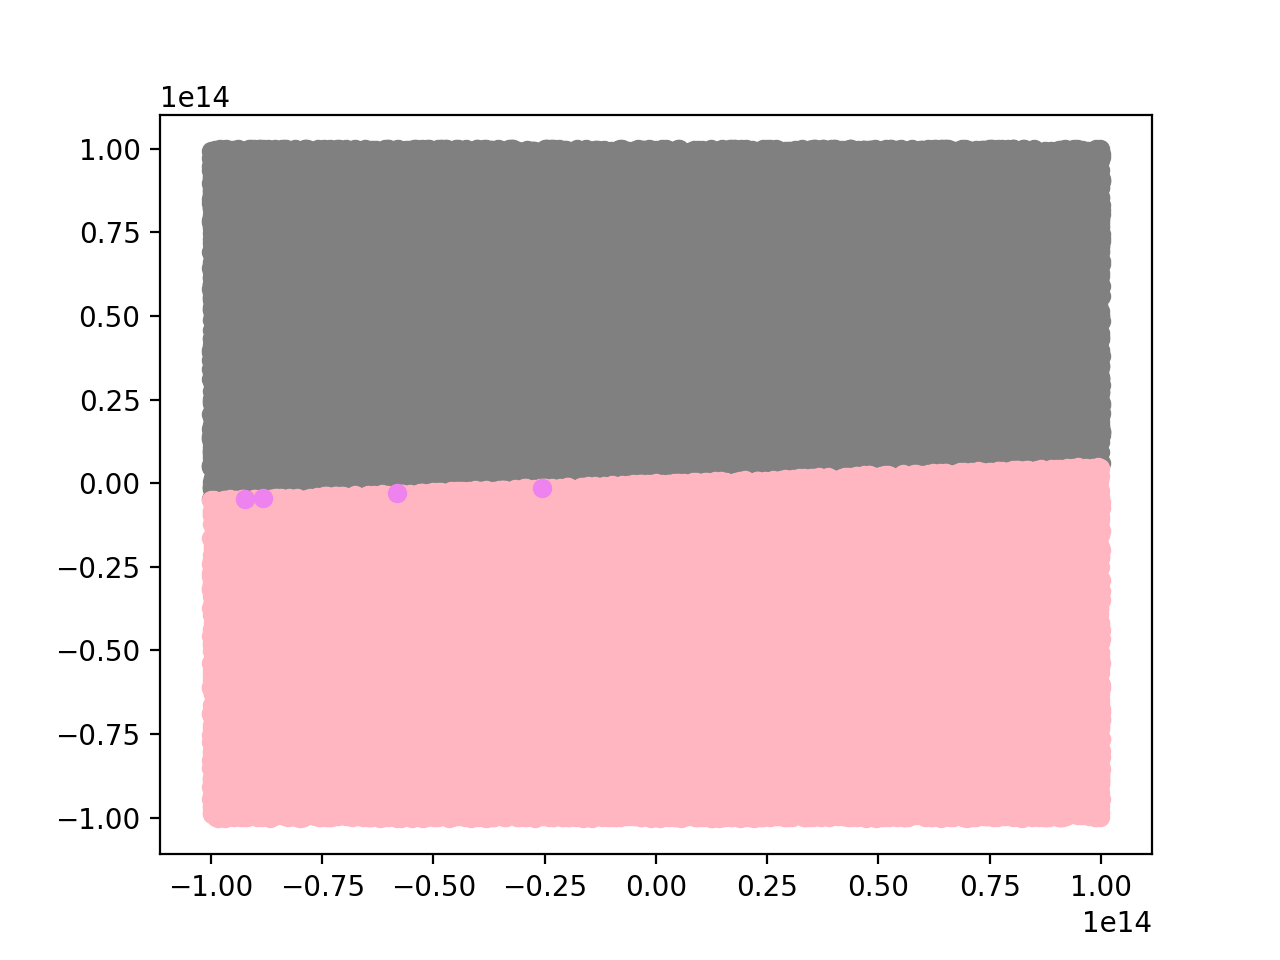

on the left :  50229
on the line :  4
on the right :  49767
Ex6 : difference  -1  on left
Ex6: difference  -3  on right
Ex6: difference  4  on line


In [162]:
%matplotlib notebook
epsilon=1000
dim=2
result = classify_points(points2, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left6_2= len(result[0].points)
right6_2=len(result[1].points)
on6_2=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

print("Ex6 : difference ", left6_2 - left6_1, " on left")
print("Ex6: difference ", right6_2 - right6_1, " on right")
print("Ex6: difference ", on6_2 - on6_1, " on line")

# 7.

7. drugi zbior punktow dla wyznacznika 2,epsilon = 10^15

<IPython.core.display.Javascript object>


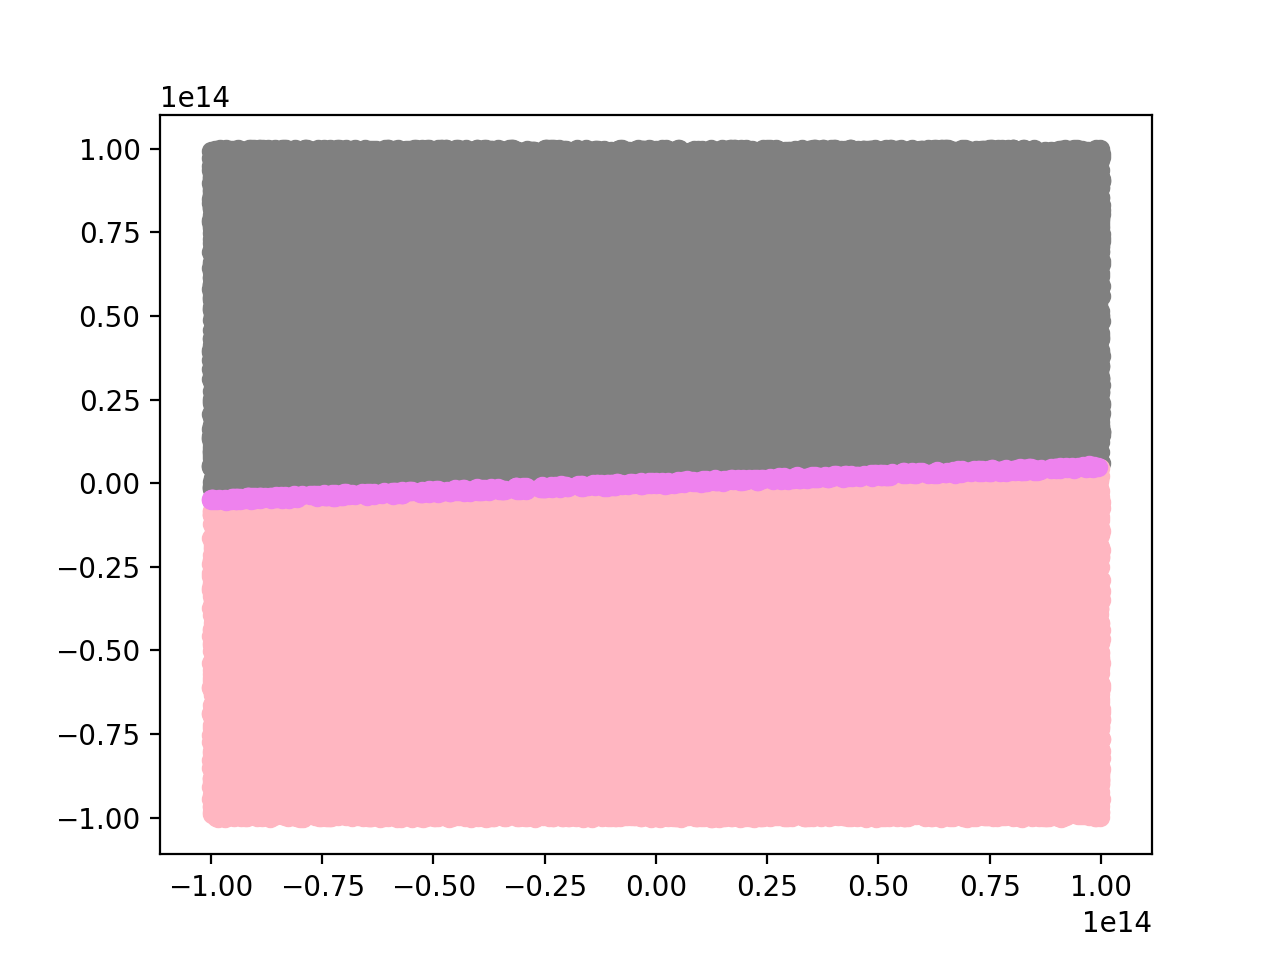

on the left :  49961
on the line :  495
on the right :  49544


In [163]:
%matplotlib notebook
epsilon=10 ** 12
dim=3
result = classify_points(points2, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left7_1= len(result[0].points)
right7_1=len(result[1].points)
on7_1=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

7. drugi zbior punktow dla wyznacznika 2,epsilon = 10^15

<IPython.core.display.Javascript object>


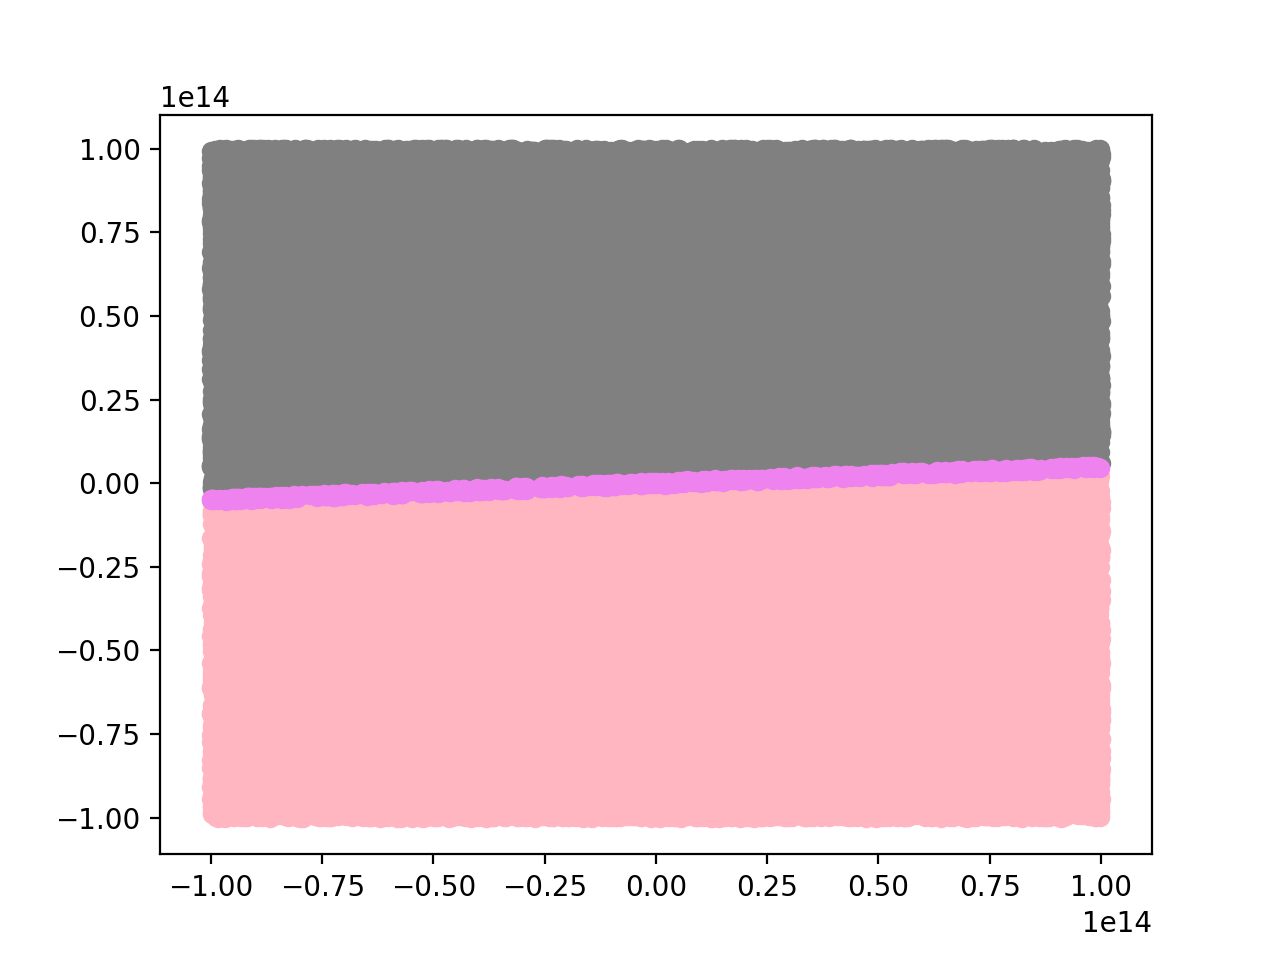

on the left :  49962
on the line :  494
on the right :  49544
Ex7 : difference  1  on left
Ex7: difference  0  on right
Ex7: difference  -1  on line


In [164]:
%matplotlib notebook
epsilon=10 ** 12
dim=2
result = classify_points(points2, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left7_2= len(result[0].points)
right7_2=len(result[1].points)
on7_2=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

print("Ex7 : difference ", left7_2 - left7_1, " on left")
print("Ex7: difference ", right7_2 - right7_1, " on right")
print("Ex7: difference ", on7_2 - on7_1, " on line")

# 8 

8. zbior punktow na okregu dla 1 wyznacznika,epsilon = 0.01

<IPython.core.display.Javascript object>


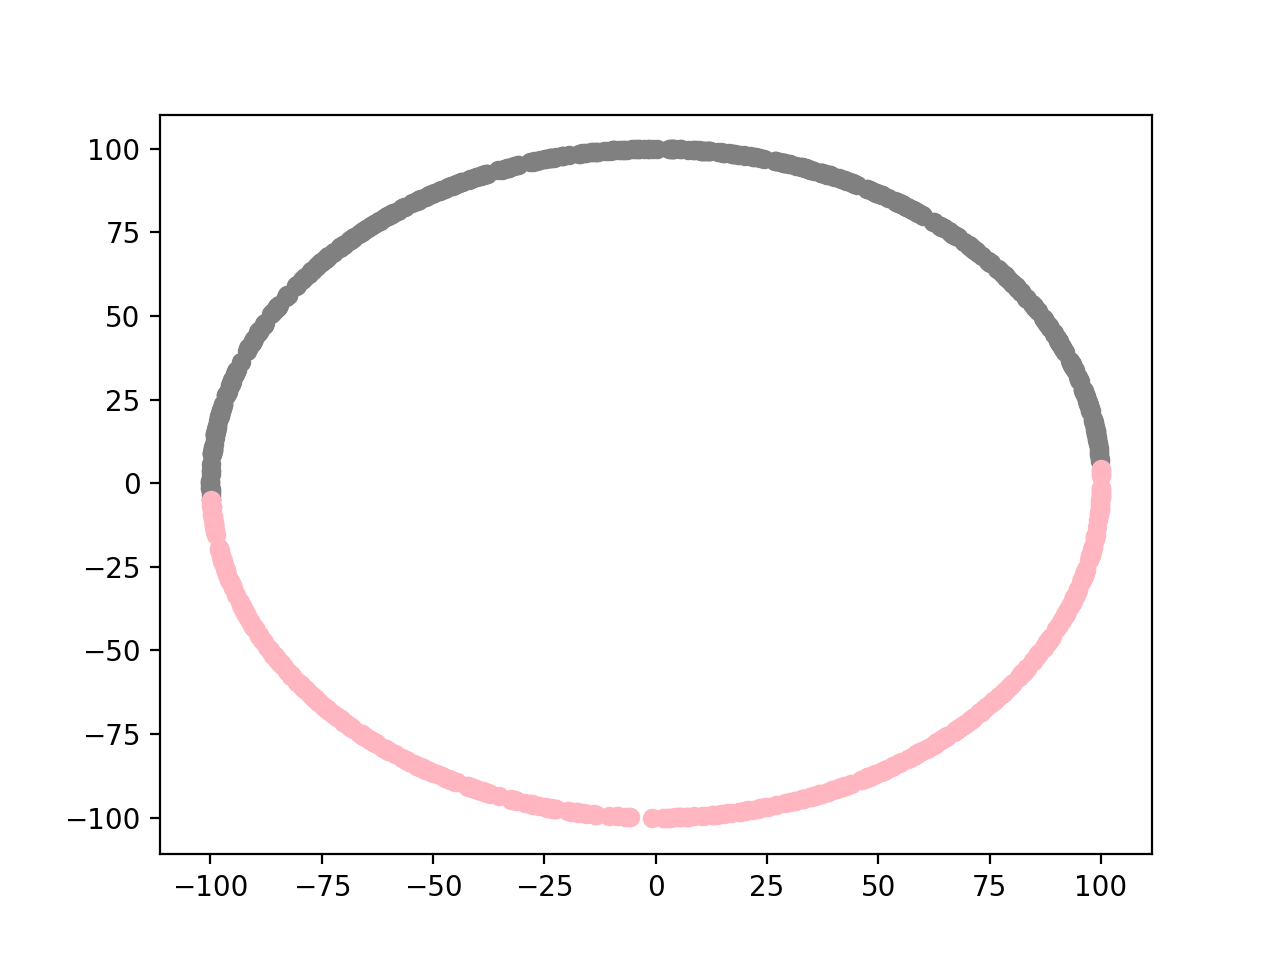

on the left :  507
on the line :  0
on the right :  493


In [165]:
%matplotlib notebook
epsilon=0.01
dim=3
points3=get_random_circle(0,0,100,1000)
result = classify_points(points3, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left8_1= len(result[0].points)
right8_1=len(result[1].points)
on8_1=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

8. zbior punktow na okregu dla 2 wyznacznika,epsilon = 0.01

<IPython.core.display.Javascript object>


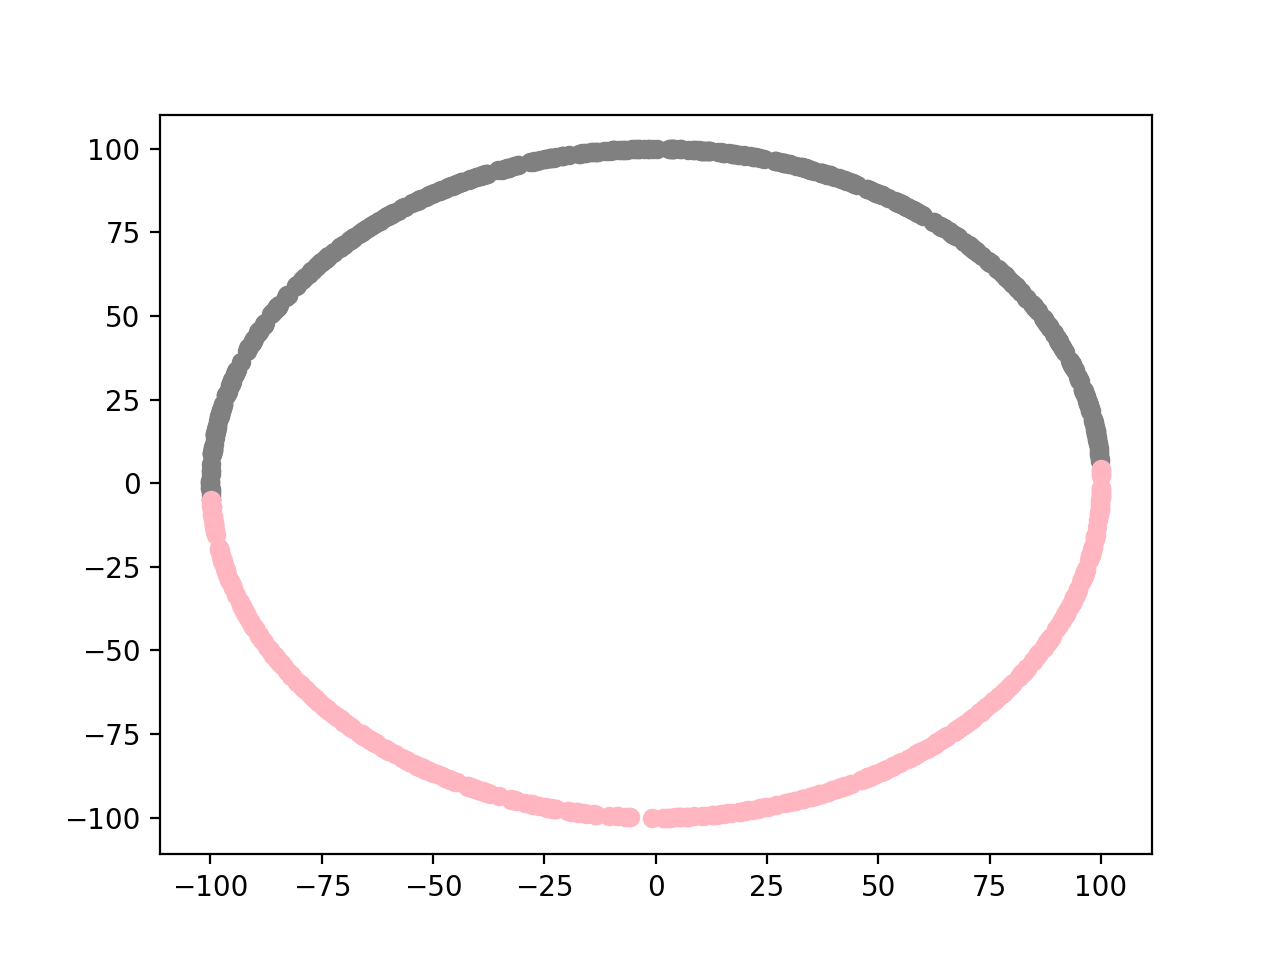

on the left :  507
on the line :  0
on the right :  493
Ex8 : difference  0  on left
Ex8: difference  0  on right
Ex8: difference  0  on line


In [166]:
%matplotlib notebook
epsilon=0.01
dim=2
result = classify_points(points3, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left8_2= len(result[0].points)
right8_2=len(result[1].points)
on8_2=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

print("Ex8 : difference ", left8_2 - left8_1, " on left")
print("Ex8: difference ", right8_2 - right8_1, " on right")
print("Ex8: difference ", on8_2 - on8_1, " on line")

# 9

9. zbior punktow na okregu dla 1 wyznacznika,epsilon = 0.1

<IPython.core.display.Javascript object>


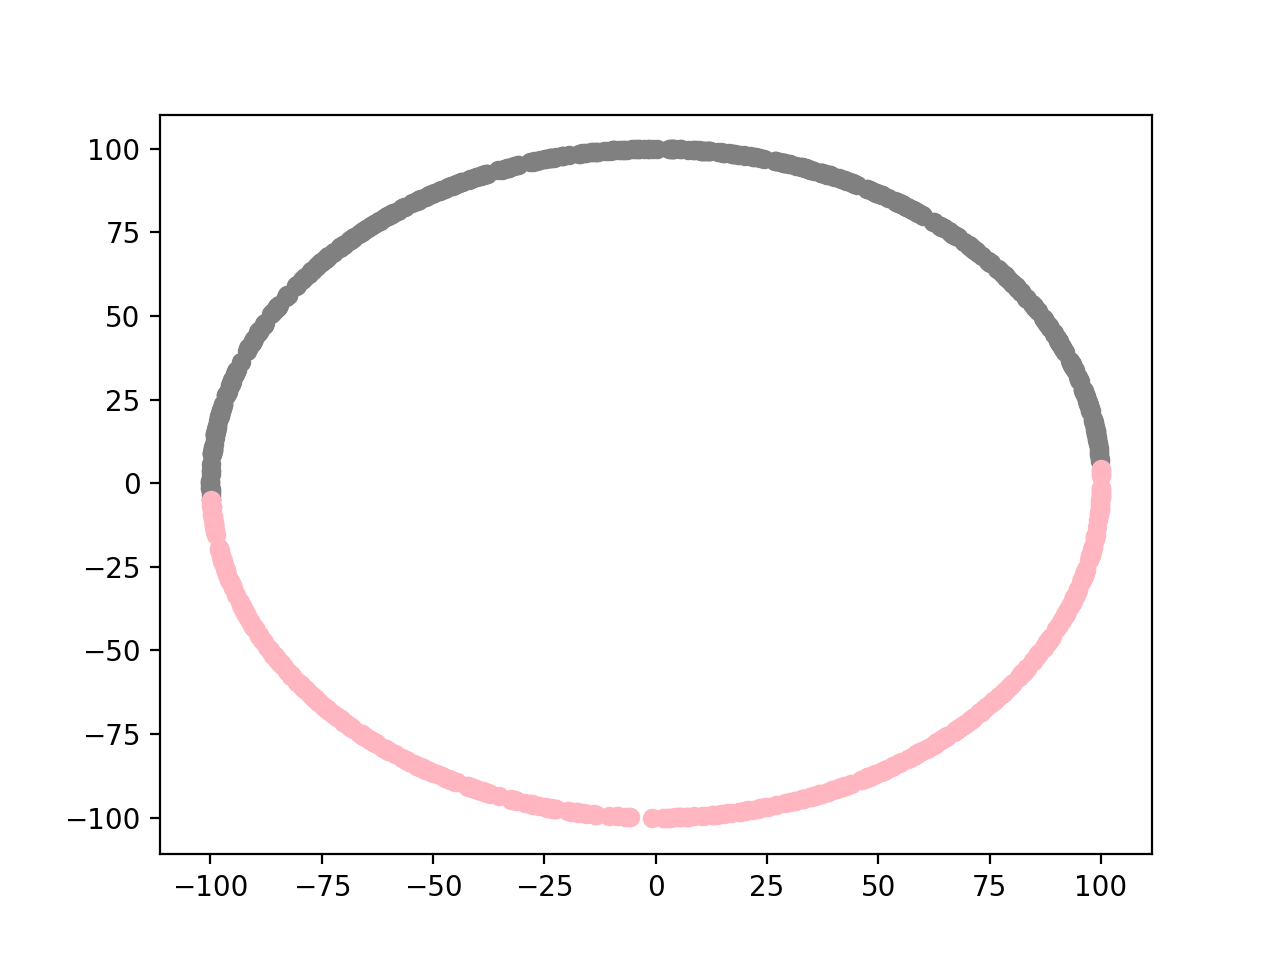

on the left :  507
on the line :  0
on the right :  493


In [167]:
%matplotlib notebook
epsilon=0.1
dim=3
result = classify_points(points3, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left9_1= len(result[0].points)
right9_1=len(result[1].points)
on9_1=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

zbior punktow na okregu dla 2 wyznacznika,epsilon = 0.1

<IPython.core.display.Javascript object>


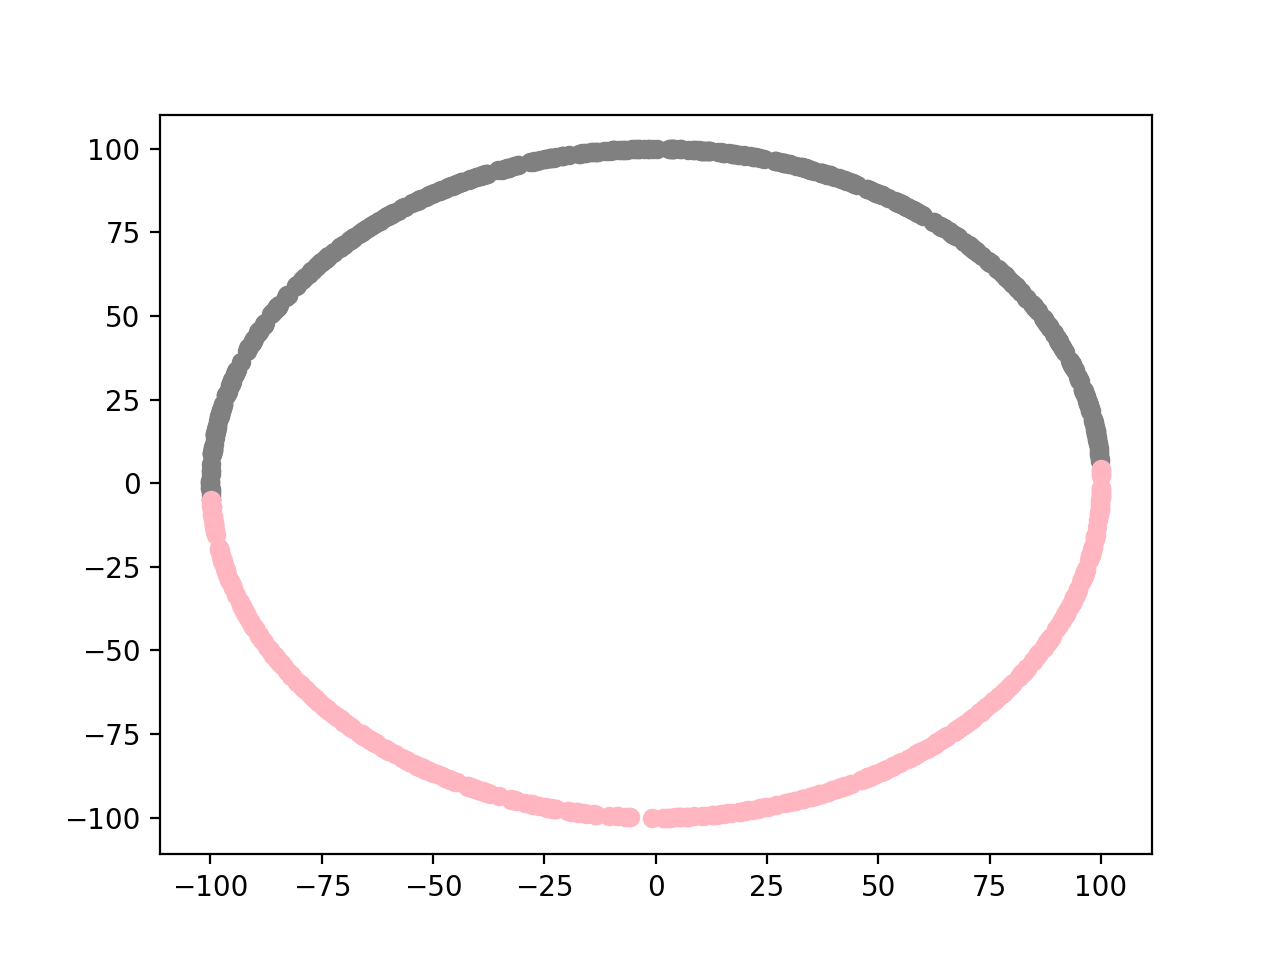

on the left :  507
on the line :  0
on the right :  493
Ex9 : difference  0  on left
Ex9: difference  0  on right
Ex9: difference  0  on line


In [168]:
%matplotlib notebook
epsilon=0.1
dim=2
result = classify_points(points3, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left9_2= len(result[0].points)
right9_2=len(result[1].points)
on9_2=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

print("Ex9 : difference ", left9_2 - left9_1, " on left")
print("Ex9: difference ", right9_2 - right9_1, " on right")
print("Ex9: difference ", on9_2 - on9_1, " on line")

# 10

10. zbior punktow na okregu dla 1 wyznacznika,epsilon = 25

<IPython.core.display.Javascript object>


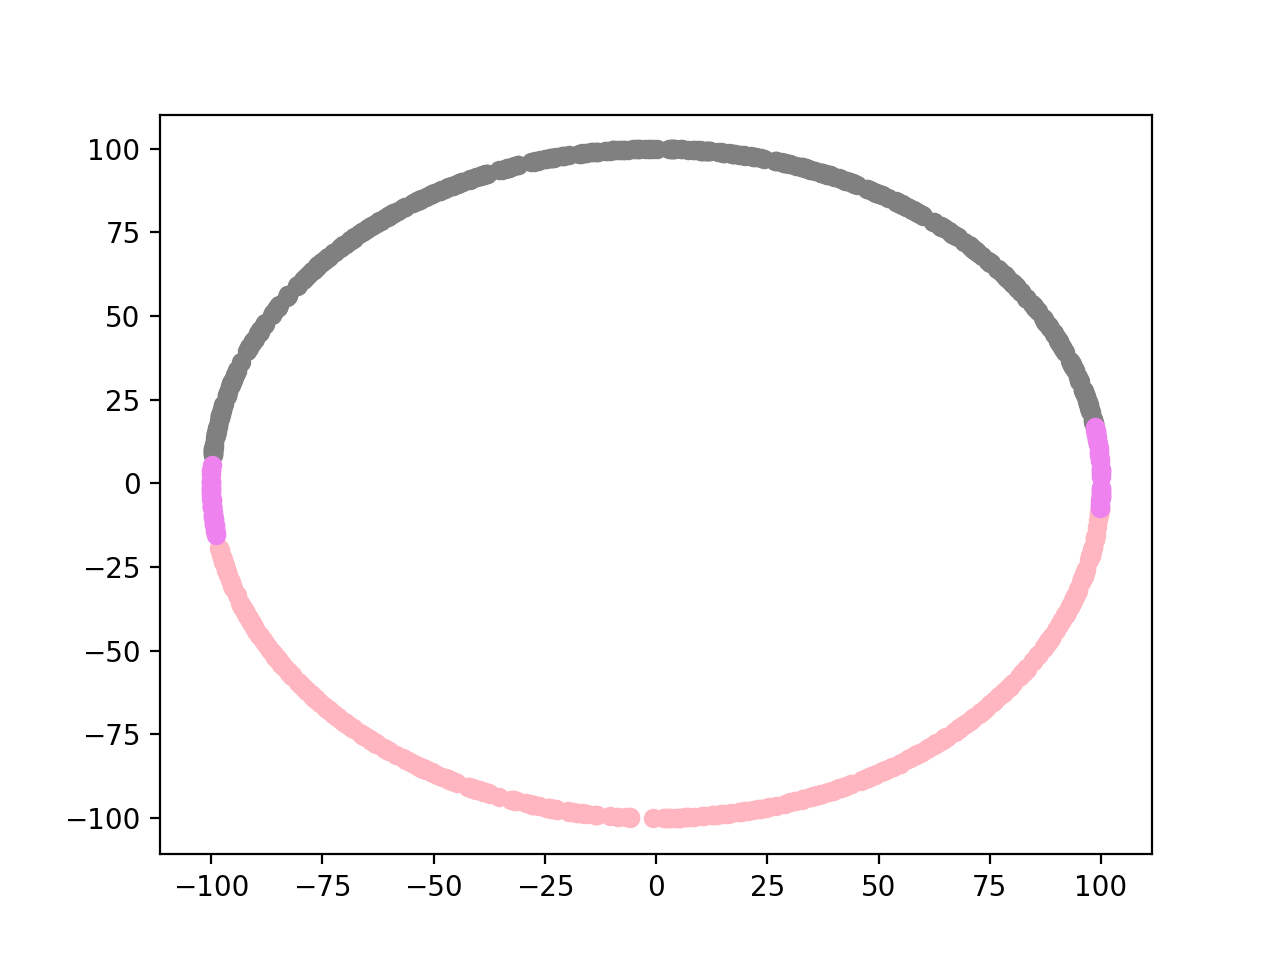

on the left :  471
on the line :  82
on the right :  447


In [169]:
%matplotlib notebook
epsilon=25
dim=3
result = classify_points(points3, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left10_1= len(result[0].points)
right10_1=len(result[1].points)
on10_1=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

10. zbior punktow na okregu dla 2 wyznacznika,epsilon = 25

<IPython.core.display.Javascript object>


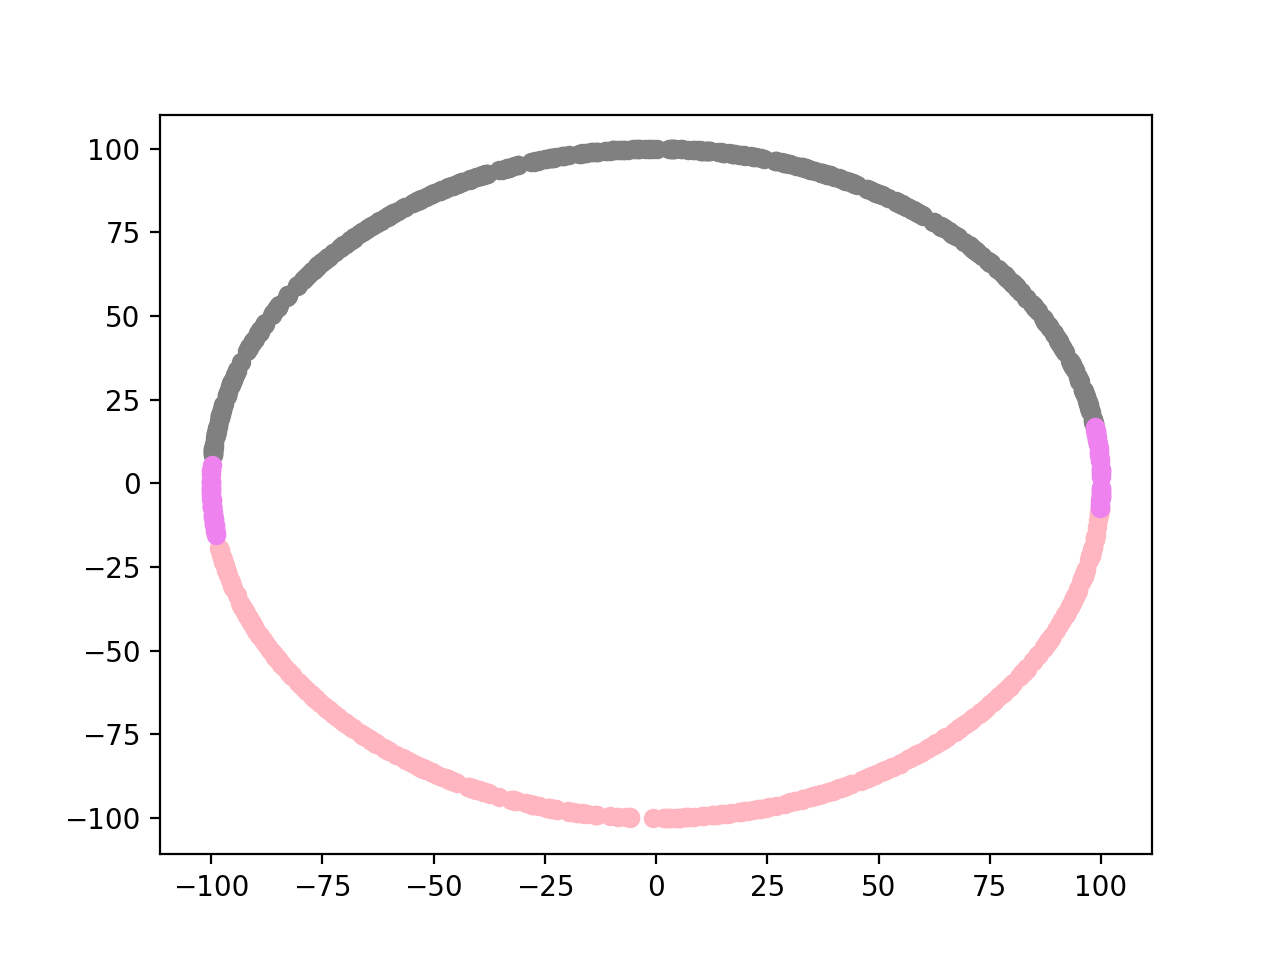

on the left :  471
on the line :  82
on the right :  447
Ex10 : difference  0  on left
Ex10: difference  0  on right
Ex10: difference  0  on line


In [170]:
%matplotlib notebook
epsilon=25
dim=2
result = classify_points(points3, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left10_2= len(result[0].points)
right10_2=len(result[1].points)
on10_2=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

print("Ex10 : difference ", left10_2 - left10_1, " on left")
print("Ex10: difference ", right10_2 - right10_1, " on right")
print("Ex10: difference ", on10_2 - on10_1, " on line")

# 11

11. zbior punktow na okregu dla 1 wyznacznika,epsilon = 1000

<IPython.core.display.Javascript object>


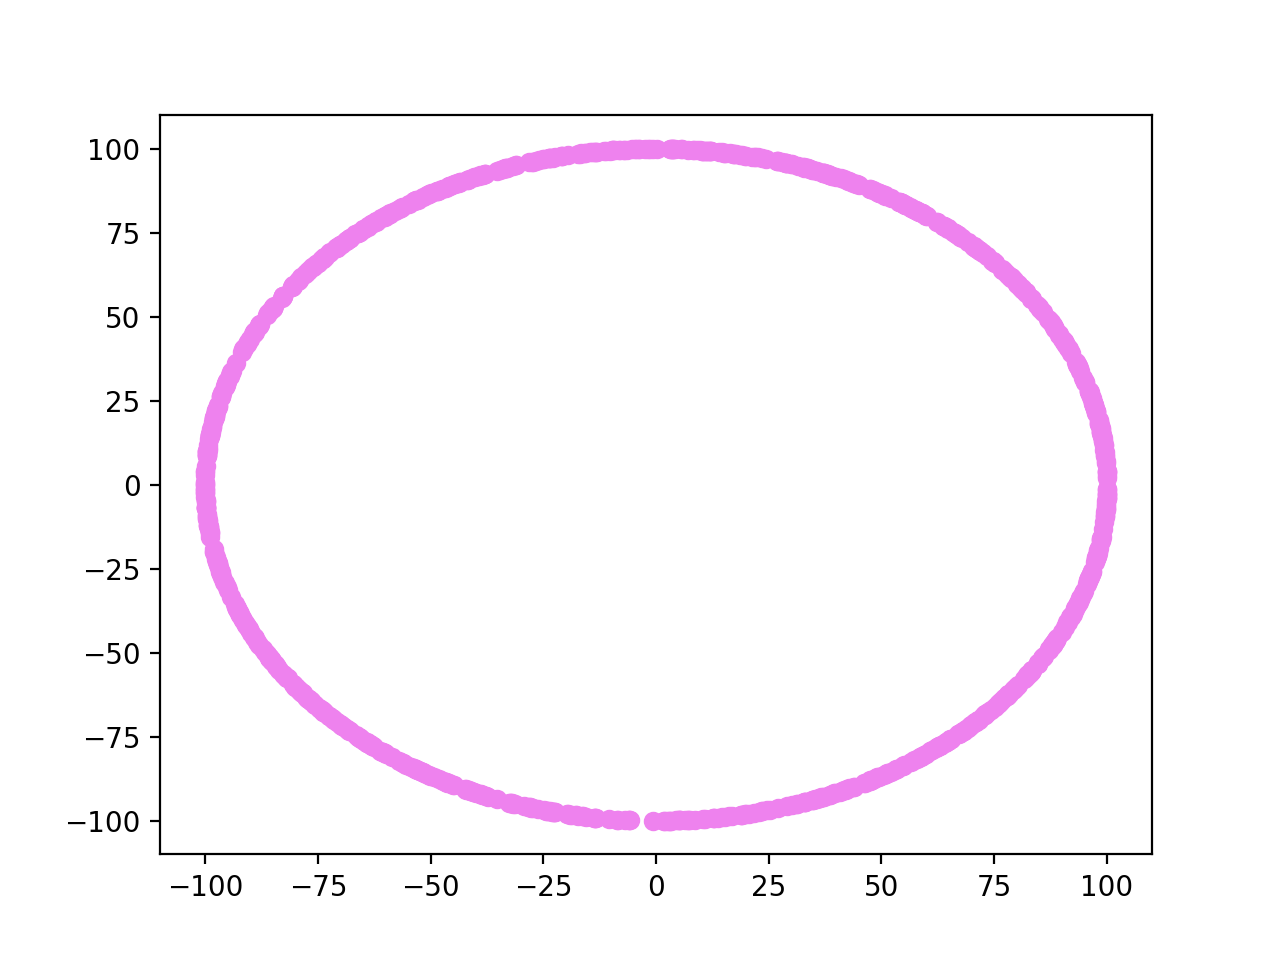

on the left :  0
on the line :  1000
on the right :  0


In [171]:
%matplotlib notebook
epsilon=1000
dim=3
result = classify_points(points3, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left11_1= len(result[0].points)
right11_1=len(result[1].points)
on11_1=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

11.zbior punktow na okregu dla 2 wyznacznika,epsilon = 1000

<IPython.core.display.Javascript object>


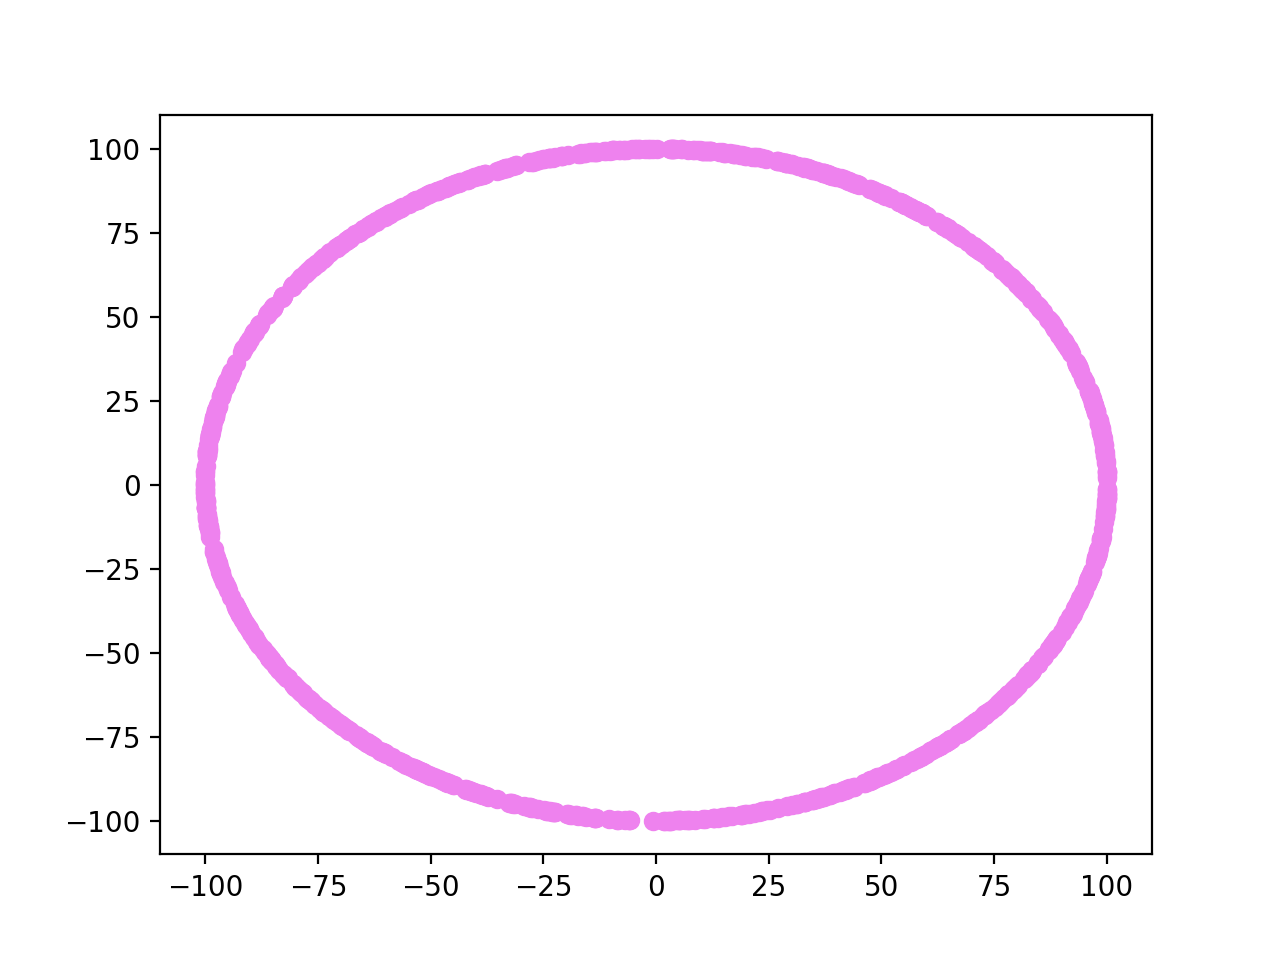

on the left :  0
on the line :  1000
on the right :  0
Ex11 : difference  0  on left
Ex11: difference  0  on right
Ex11: difference  0  on line


In [172]:
%matplotlib notebook
epsilon=1000
dim=2
result = classify_points(points3, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left11_2= len(result[0].points)
right11_2=len(result[1].points)
on11_2=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

print("Ex11 : difference ", left11_2 - left11_1, " on left")
print("Ex11: difference ", right11_2 - right11_1, " on right")
print("Ex11: difference ", on11_2 - on11_1, " on line")

# 12

12. zbior punktow na prostej dla 1 wyznacznika,epsilon = 0.001

<IPython.core.display.Javascript object>


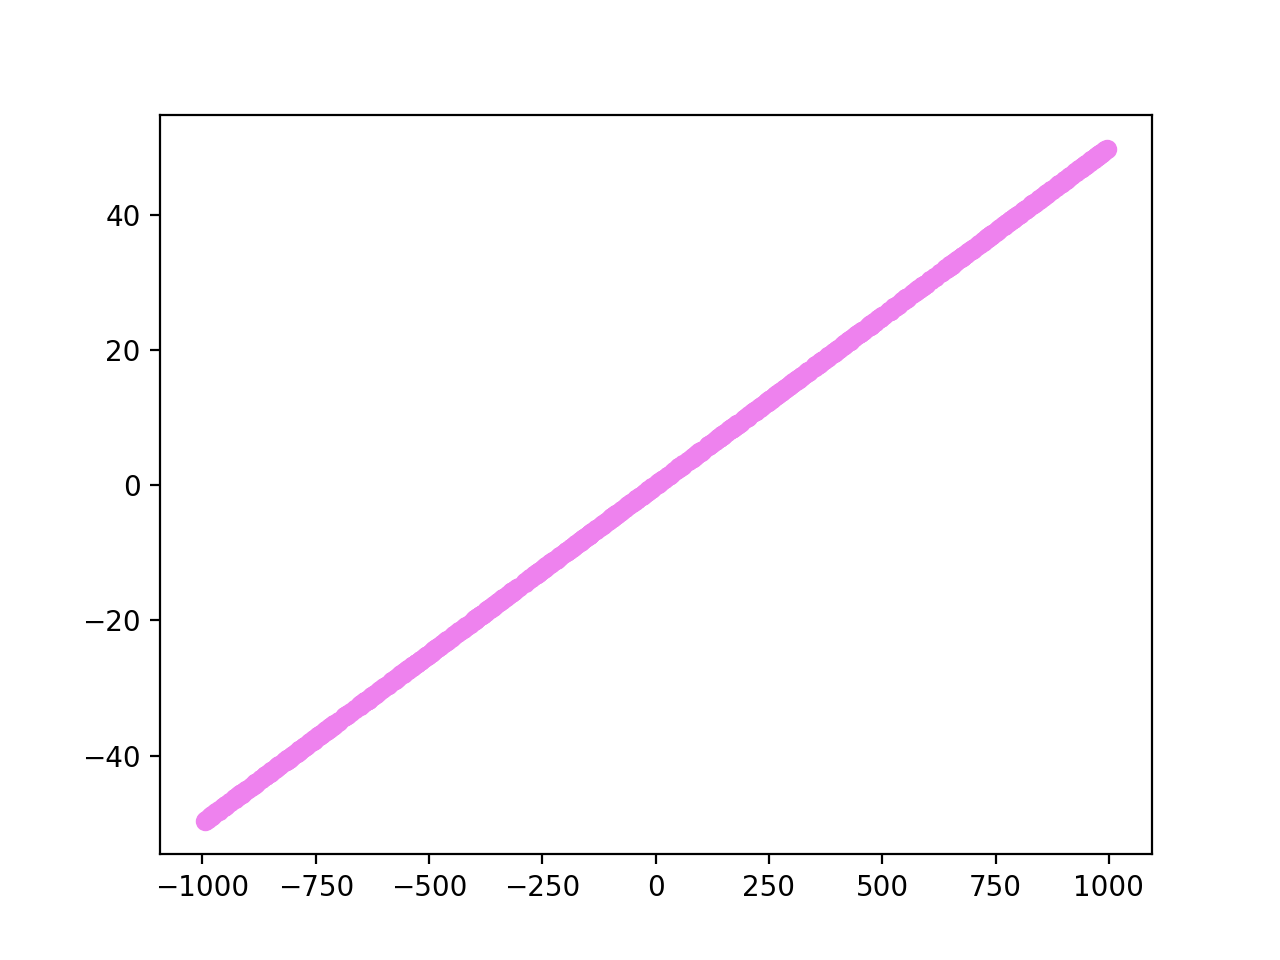

on the left :  0
on the line :  1000
on the right :  0


In [16]:
%matplotlib notebook
epsilon=0.001
dim=3
points4=get_random_on_line(-1000, 1000, 1000)
result = classify_points(points4, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left12_1= len(result[0].points)
right12_1=len(result[1].points)
on12_1=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

zbior punktow na prostej dla 2 wyznacznika,epsilon = 0.001

<IPython.core.display.Javascript object>


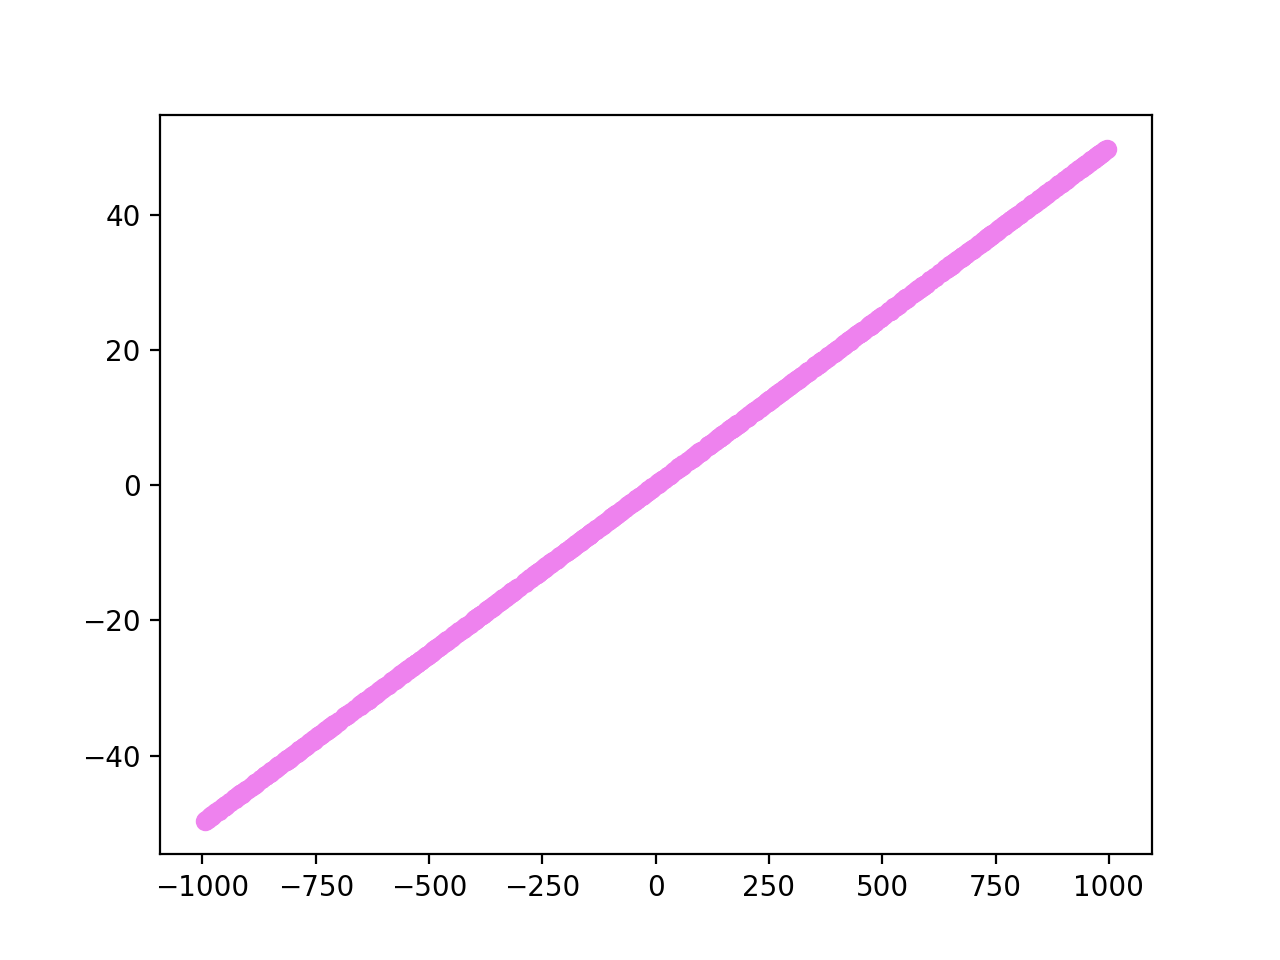

on the left :  0
on the line :  1000
on the right :  0
Ex12 : difference  0  on left
Ex12: difference  0  on right
Ex12: difference  0  on line


In [17]:
%matplotlib notebook
epsilon=0.001
dim=2
result = classify_points(points4, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left12_2= len(result[0].points)
right12_2=len(result[1].points)
on12_2=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

print("Ex12 : difference ", left12_2 - left12_1, " on left")
print("Ex12: difference ", right12_2 - right12_1, " on right")
print("Ex12: difference ", on12_2 - on12_1, " on line")

# 13

zbior punktow na prostej dla 2 wyznacznika,epsilon = 10 ^ (-20)

<IPython.core.display.Javascript object>


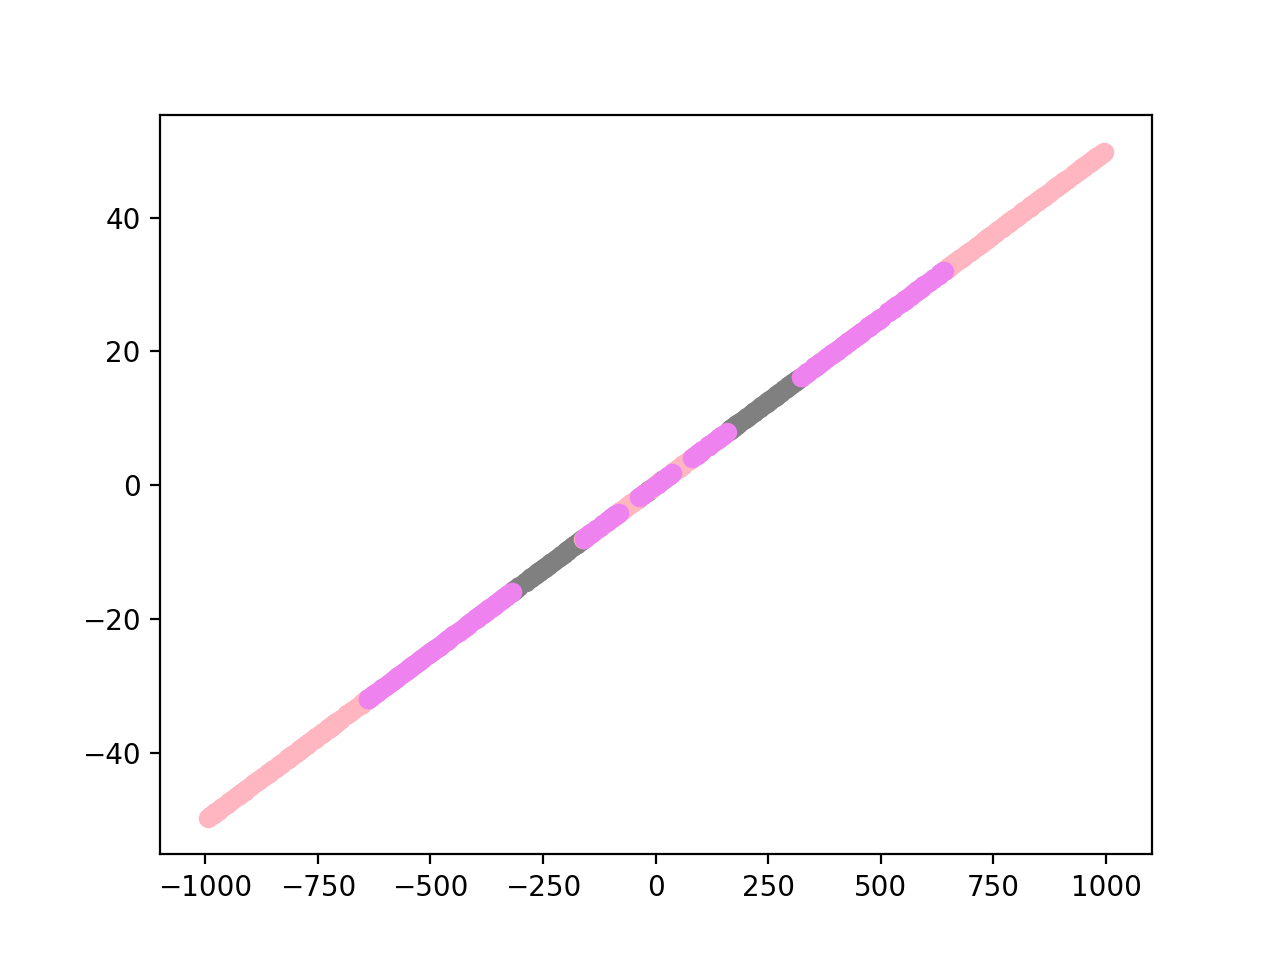

on the left :  188
on the line :  433
on the right :  379


In [24]:
%matplotlib notebook
epsilon=10 ** (-20)
dim=3
result = classify_points(points4, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left13_1= len(result[0].points)
right13_1=len(result[1].points)
on13_1=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

13. zbior punktow na prostej dla 2 wyznacznika,epsilon = 10 ^ (-20)

<IPython.core.display.Javascript object>


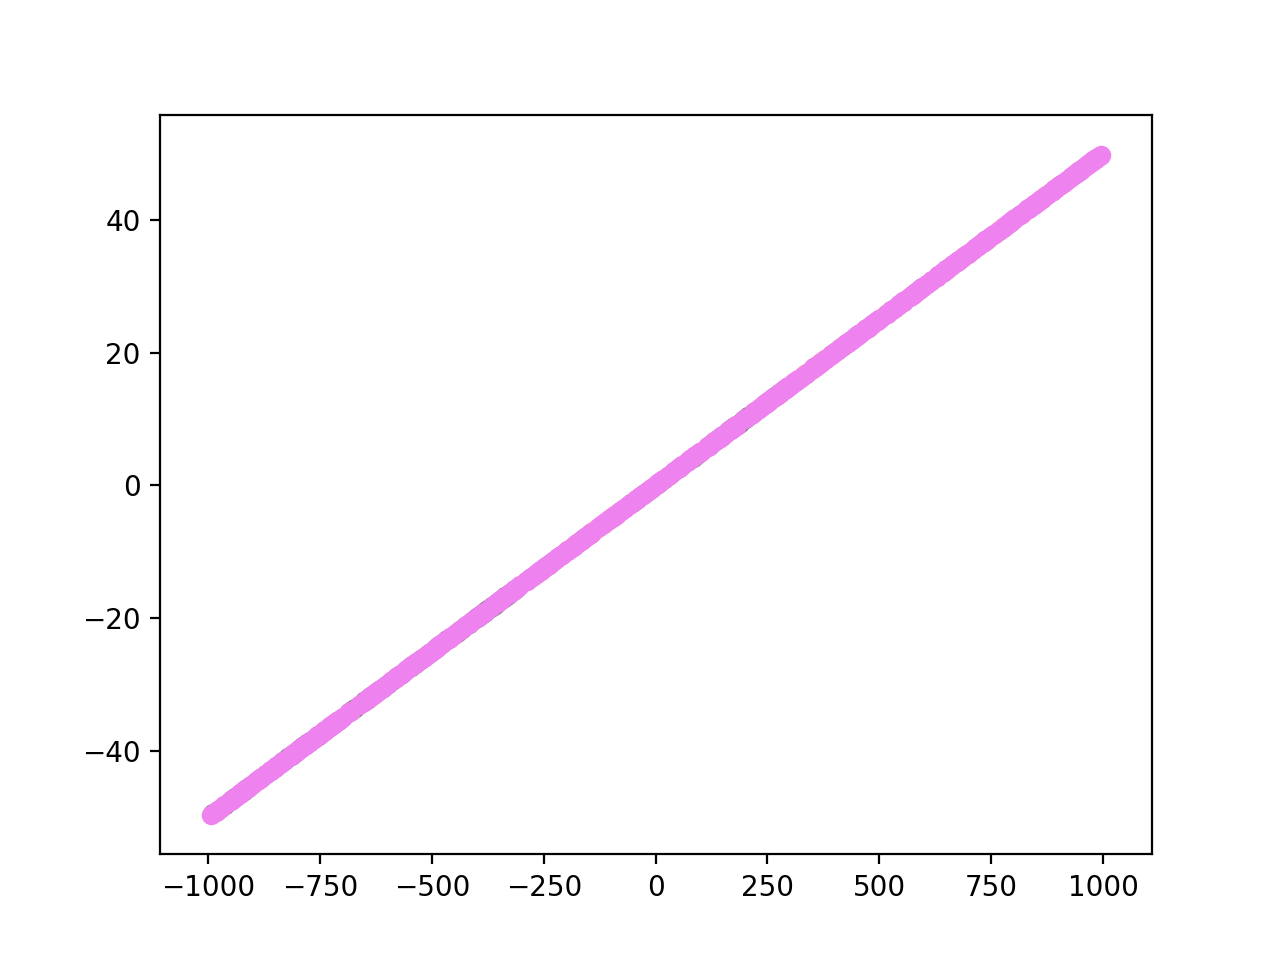

on the left :  142
on the line :  684
on the right :  174
Ex13 : difference  -46  on left
Ex13: difference  -205  on right
Ex13: difference  251  on line


In [25]:
%matplotlib notebook
epsilon=10 ** (-20)
dim=2
result = classify_points(points4, -1.0, 0.0, 1.0, 0.1, epsilon,dim)
plot=Plot([result[0],result[1], result[2]])
plot.draw()

left13_2= len(result[0].points)
right13_2=len(result[1].points)
on13_2=len(result[2].points)

print ("on the left : " , len(result[0].points))
print ("on the line : " , len(result[2].points))
print ("on the right : ", len(result[1].points)) 

print("Ex13 : difference ", left13_2 - left13_1, " on left")
print("Ex13: difference ", right13_2 - right13_1, " on right")
print("Ex13: difference ", on13_2 - on13_1, " on line")